In [101]:
import glob
import os

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [102]:
def print_pat(pattern):
    # Patterns already have \n as line separators, how convenient...
    print(pattern)

def count_stones(pattern):
    return pattern.count('w') + pattern.count('b')

def timeline_top_patterns_from_version(version, max_display_patterns,
                                       min_num_stones):
    """
    Find the most frequent patterns from a given version and plot their
    popularity across all other versions
  
    version: column representing a certain slice through the games ("version")
    """
    print("Processing top patterns from", version,
        "min_num_stones", min_num_stones)
    num_found = 0
    data = df.sort_values(by=version, ascending=False)
    for i in range(df.shape[0]):
        if num_found >= max_display_patterns:
            break
        pattern_timeline = data.iloc[i]
        pattern = pattern_timeline.name
        if count_stones(pattern) < min_num_stones:
            continue
        num_found += 1
        print_pat(pattern)
        plt.figure()
        # plt.ylim(0.0, 1.0)
        pattern_timeline.plot()
        plt.title("Pattern timeline")
        plt.show()

In [103]:
# minigo 9x9 training sgfs downloaded from: https://console.cloud.google.com/storage/browser/minigo-pub/v3-9x9/sgf?pli=1

basedir = "minigo_9x9_patterns"
preprocessed_csv_files = sorted(glob.glob(os.path.join(basedir, "*.csv")))
preprocessed_csv_files

['minigo_9x9_patterns\\collection_minigo.9x9.050_numgames_9073_numpatterns_57187.csv',
 'minigo_9x9_patterns\\collection_minigo.9x9.075_numgames_9634_numpatterns_42485.csv',
 'minigo_9x9_patterns\\collection_minigo.9x9.100_numgames_9704_numpatterns_54608.csv',
 'minigo_9x9_patterns\\collection_minigo.9x9.110_numgames_10480_numpatterns_63270.csv',
 'minigo_9x9_patterns\\collection_minigo.9x9.120_numgames_10268_numpatterns_48792.csv',
 'minigo_9x9_patterns\\collection_minigo.9x9.125_numgames_10517_numpatterns_42112.csv',
 'minigo_9x9_patterns\\collection_minigo.9x9.130_numgames_10508_numpatterns_32878.csv',
 'minigo_9x9_patterns\\collection_minigo.9x9.135_numgames_11874_numpatterns_50048.csv',
 'minigo_9x9_patterns\\collection_minigo.9x9.140_numgames_10493_numpatterns_37871.csv',
 'minigo_9x9_patterns\\collection_minigo.9x9.145_numgames_11604_numpatterns_51139.csv',
 'minigo_9x9_patterns\\collection_minigo.9x9.150_numgames_11645_numpatterns_42962.csv',
 'minigo_9x9_patterns\\collection_m

In [116]:
df = None
FREQ_COL = 'frequency'
# How many patterns found in each column
num_patterns_in_col = []
# How many games processed in each column
num_games_in_col = []
batch_names = []
for epoch in preprocessed_csv_files:
    # print('processing', epoch)
    fname = os.path.basename(epoch[:-4])
    toks = fname.split('_')
    name = toks[1][-3:]
    batch_names.append(name)
    num_games = int(toks[3])
    num_games_in_col.append(num_games)
    num_patterns = int(toks[5])
    num_patterns_in_col.append(num_patterns)
    # print(name, num_games, num_patterns, 1.0*num_patterns/num_games)
    epoch_df = pd.read_csv(epoch, index_col='pattern')
    assert epoch_df.shape[0] == num_patterns
    if 'matched_sgf' in epoch_df.columns:
        epoch_df = epoch_df.drop(('matched_sgf'), axis=1)
    if df is None:
        df = epoch_df
    else:
        assert FREQ_COL not in df.columns
        df = df.join(epoch_df, how='outer')
    # print(name)
    assert name not in df.columns
    df[name] = 1.0 * df[FREQ_COL]/num_games
    df = df.drop((FREQ_COL), axis=1)

In [ ]:
df.head()

In [ ]:
# Plot patterns-per-game ratio over the columns
# The first few generations have a much larger
# number of unique patterns because of pretty much playing randomly.
x = range(len(batch_names))
y = np.array(num_patterns_in_col)/np.array(num_games_in_col)
plt.plot(x, y)
plt.xticks(x, batch_names, rotation='vertical')
plt.show()

In [106]:
df[pd.isnull(df)] = 0

In [107]:
df.columns

Index(['050', '075', '100', '110', '120', '125', '130', '135', '140', '145',
       '150', '155', '160', '165', '170', '171', '172', '173', '174', '175',
       '176', '177', '178', '179', '180', '181', '182', '183', '184'],
      dtype='object')

In [108]:
df.shape

(833241, 29)

In [110]:
# look at the most frequent pattern in the first columns, as an example
# (By the way, if the first column is mostly random-play from early training,
# the pattern will look very random)
#
pattern = df.sort_values(by=df.columns[0], ascending=False).iloc[0].name

In [111]:
print_pat(pattern)

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . b w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


In [112]:
count_stones(pattern)

4

In [ ]:
# Looking at most frequent patterns in each column while filtering out patterns with not enough stones
"""
max_display_patterns = 10
min_num_stones = 6
for col in df.columns:
  print('-------')
  print(col)
  num_found = 0
  data = df.sort_values(by=col, ascending=False)
  for i in range(df.shape[0]):
    if num_found >= max_display_patterns:
      break
    pattern = data.iloc[i].name
    if count_stones(pattern) < min_num_stones:
      continue
    num_found += 1
    print('')
    print(data.iloc[i][col])
    print_pat(pattern)
    print('')
"""

Processing top patterns from 050 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . b w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


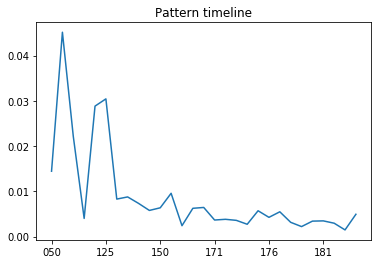

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b b w . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


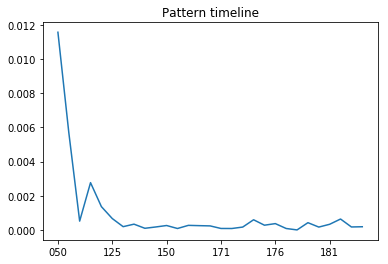

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b b . . . =
= . . . . w w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


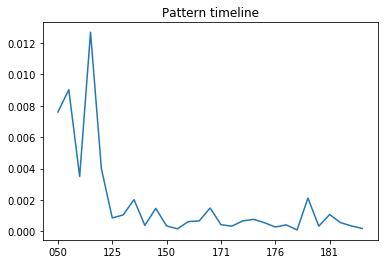

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . b w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


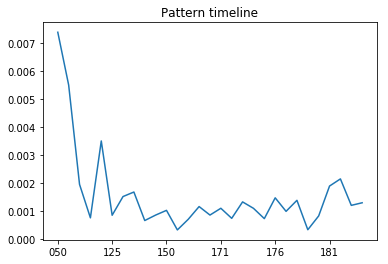

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


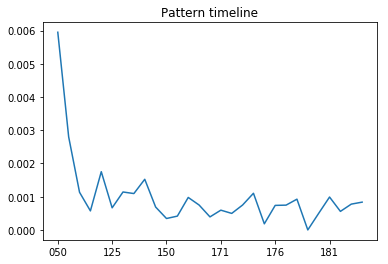

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b b w . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


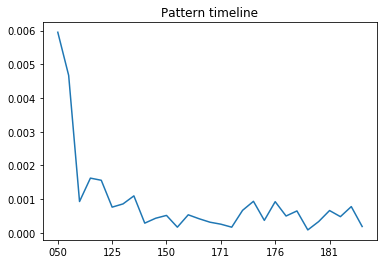

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b b w . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


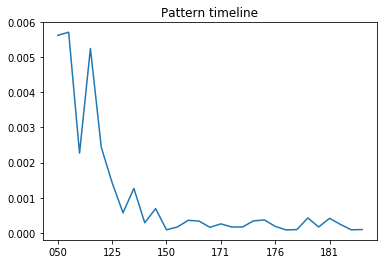

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b w b . . . =
= . . . . . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


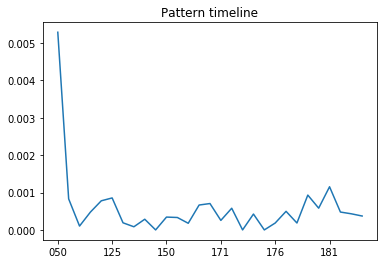

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . b b w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


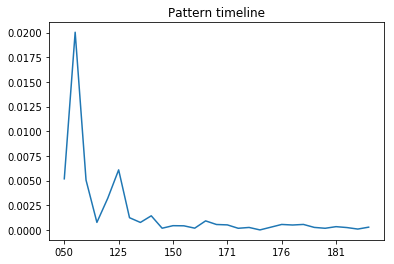

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b b . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


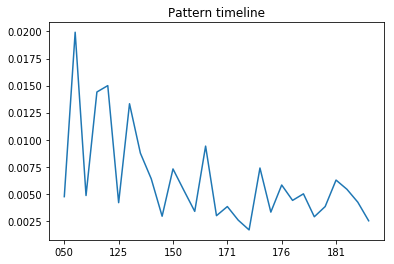

Processing top patterns from 075 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . b w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


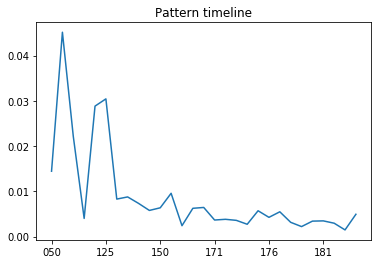

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . b b w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


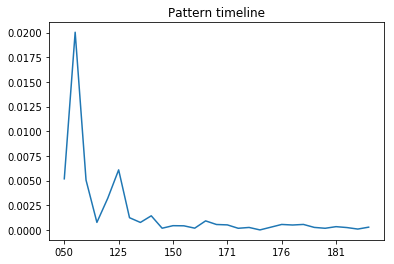

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b b . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


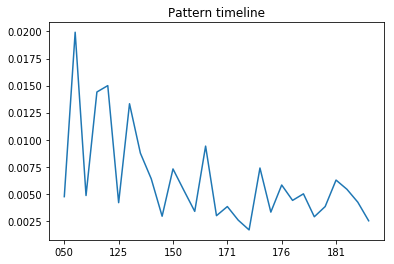

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


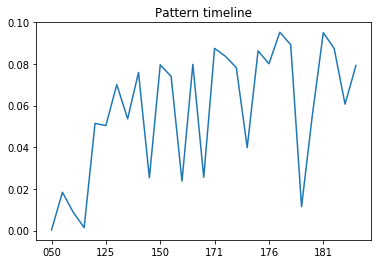

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . b b w . . =
= . . . . . . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


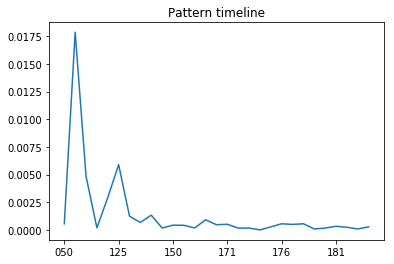

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


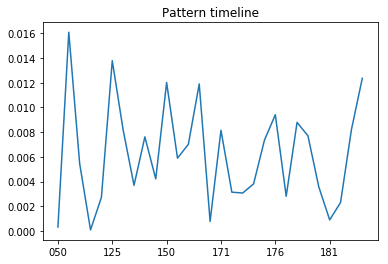

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


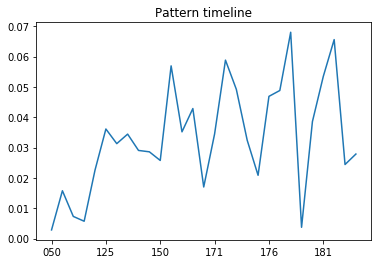

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . . . w . . . =
= . . . w . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


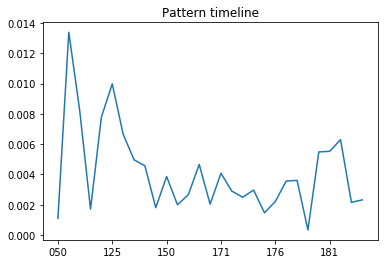

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . . w . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


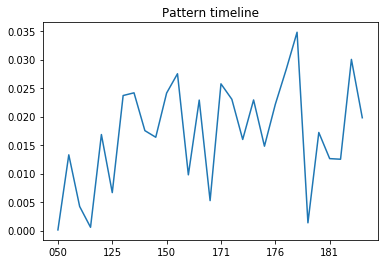

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b b w . . . =
= . . . . . b w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


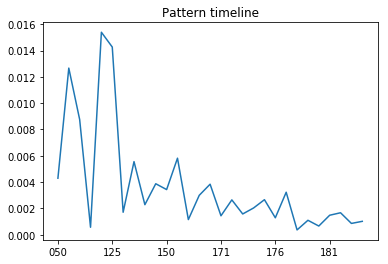

Processing top patterns from 100 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . . b . . =
= . . . . . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


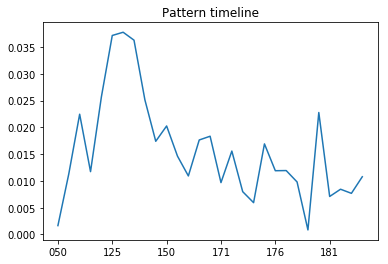

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . b w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


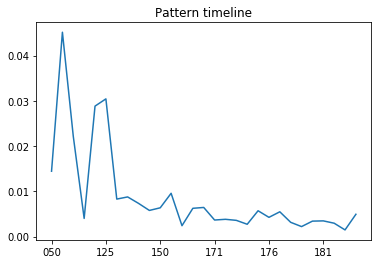

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . w . . . . . =
= . . . . . b . . . =
= . . . w . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


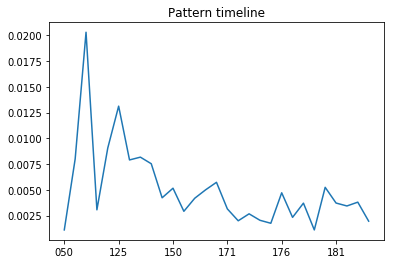

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . . b . . =
= . . w . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


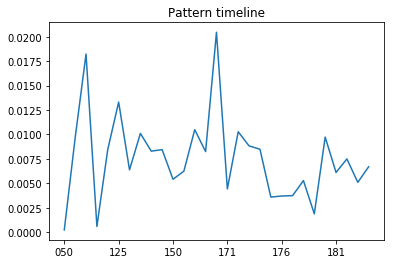

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


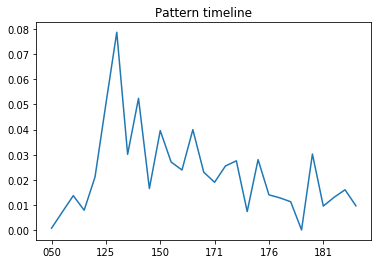

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . b . . =
= . . . . . . . . . =
= . . w . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


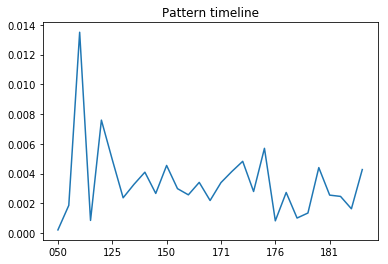

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w b . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


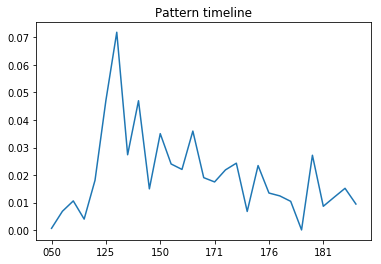

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


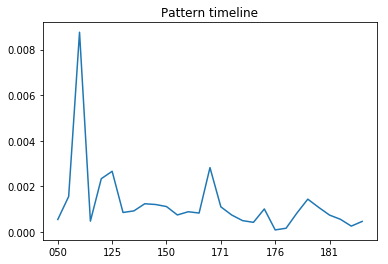

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b b w . . . =
= . . . . . b w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


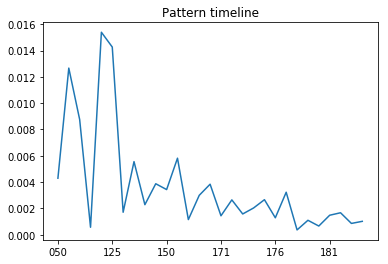

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


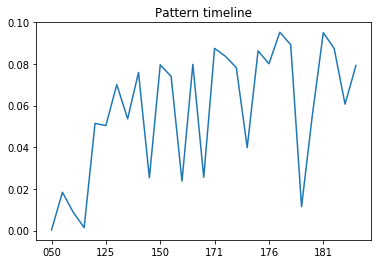

Processing top patterns from 110 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b b . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


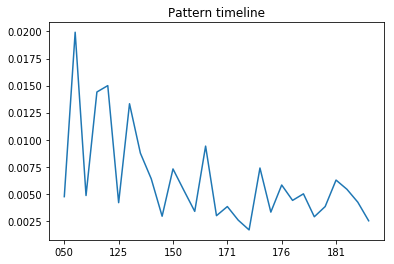

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b b . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


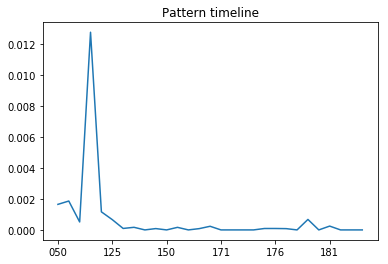

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b b . . . =
= . . . . w w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


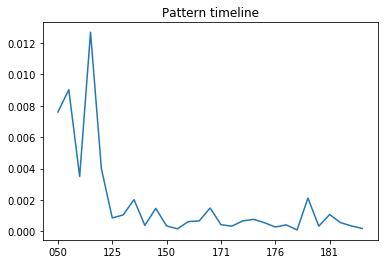

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . . b . . =
= . . . . . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


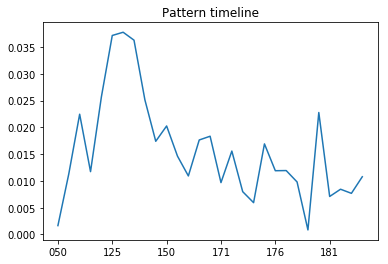

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


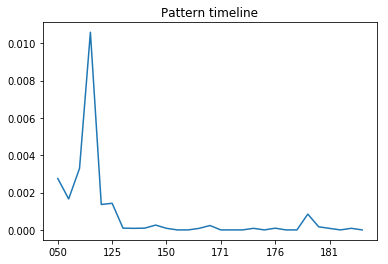

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . . w . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


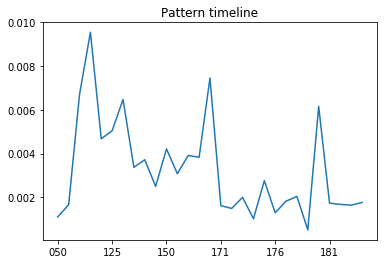

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


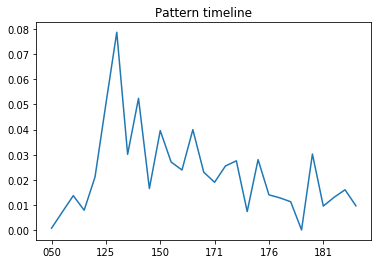

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . w b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


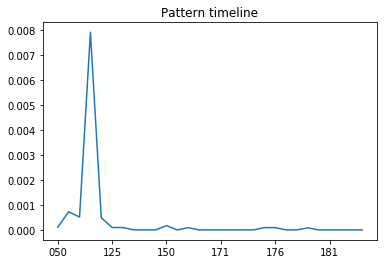

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b b . . . =
= . . . w w w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


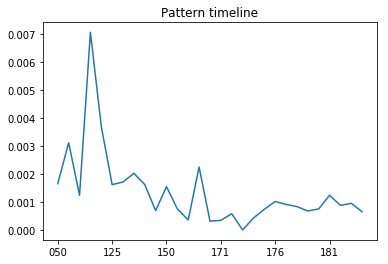

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . . . w . . . =
= . . w . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


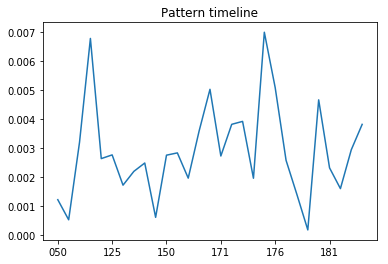

Processing top patterns from 120 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


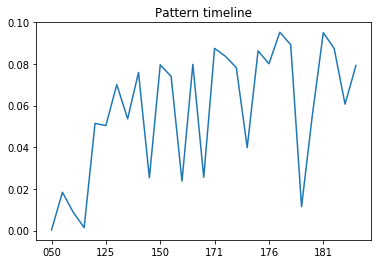

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . b w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


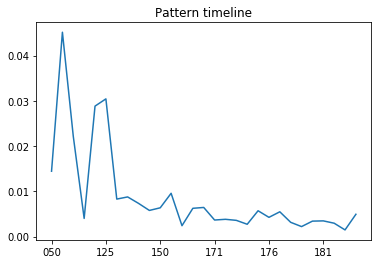

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . . b . . =
= . . . . . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


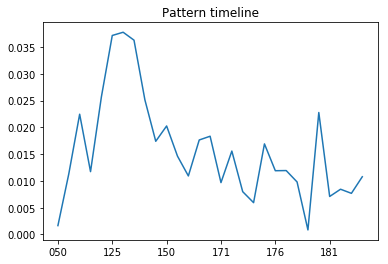

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


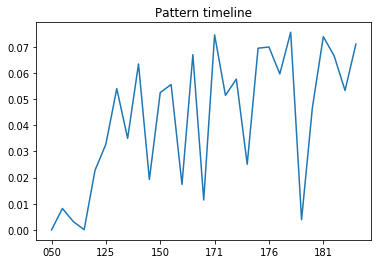

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


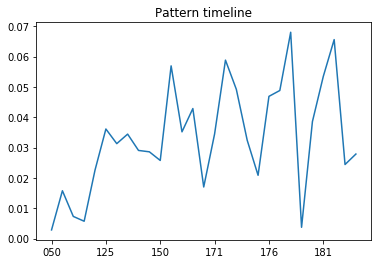

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


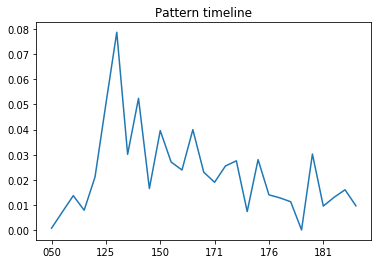

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w b . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


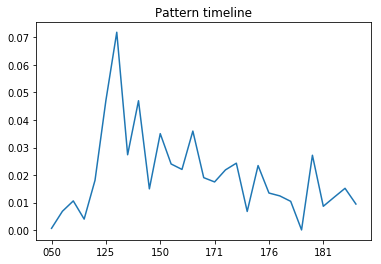

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . . w . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


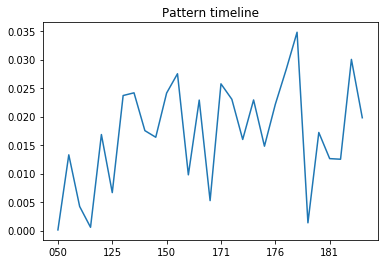

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b b w . . . =
= . . . . . b w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


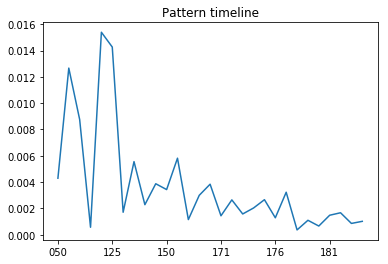

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b b . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


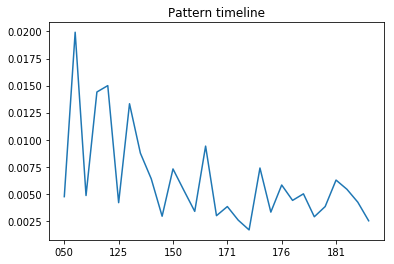

Processing top patterns from 125 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


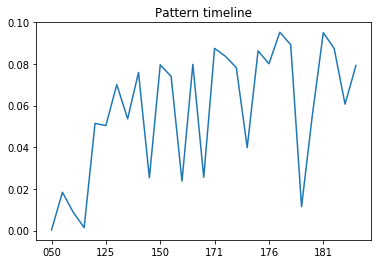

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


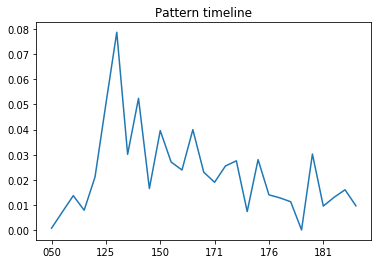

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w b . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


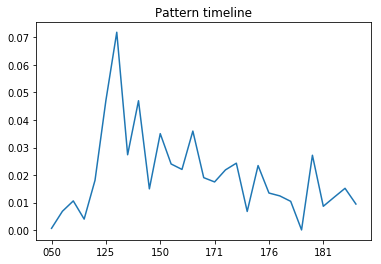

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . . b . . =
= . . . . . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


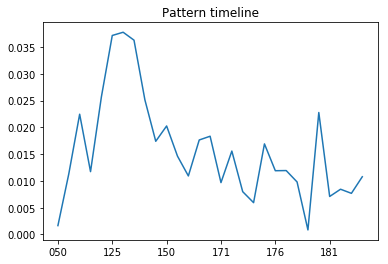

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


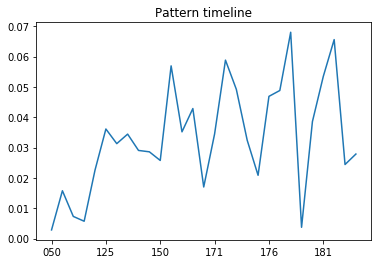

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w b . . =
= . . . . . . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


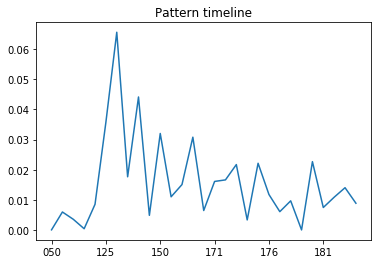

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


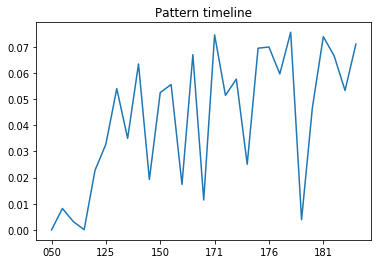

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . b w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


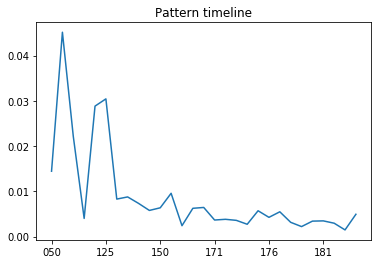

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . b w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


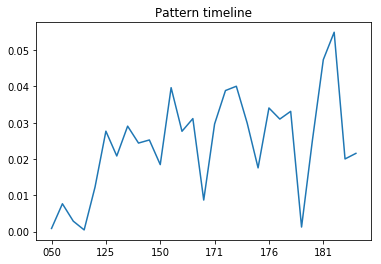

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . b . . . =
= . . . w . w b . . =
= . . . . . . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


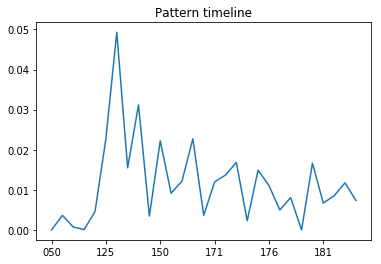

Processing top patterns from 130 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


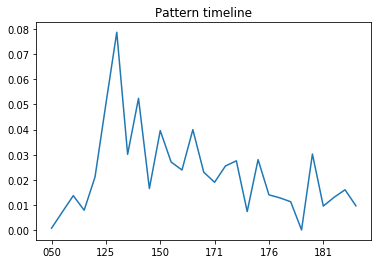

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w b . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


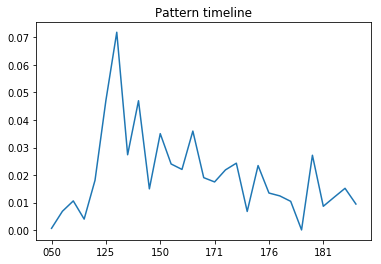

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


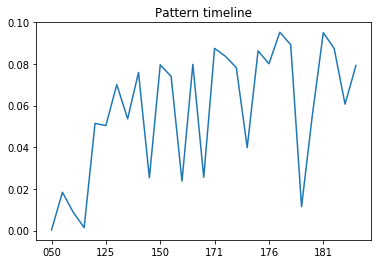

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w b . . =
= . . . . . . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


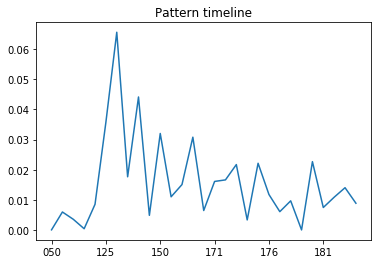

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


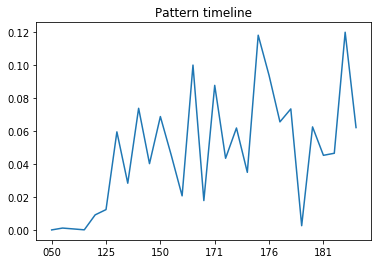

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


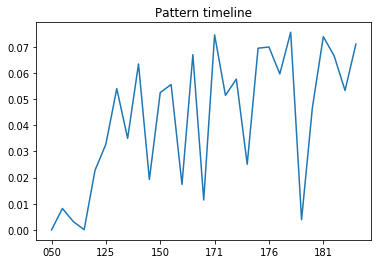

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . b . . . =
= . . . w . w b . . =
= . . . . . . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


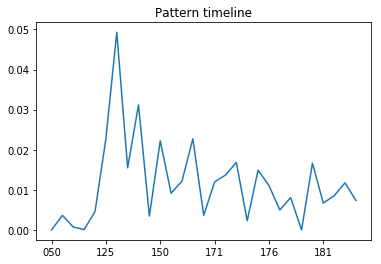

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . b . . b . . =
= . . b w . w . . . =
= . . w . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


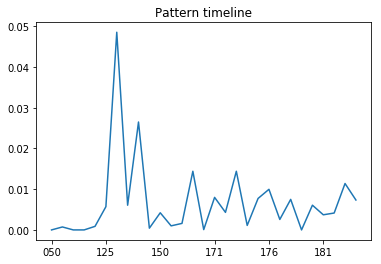

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . b . . . =
= . . . w . w b . . =
= . . . . w . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


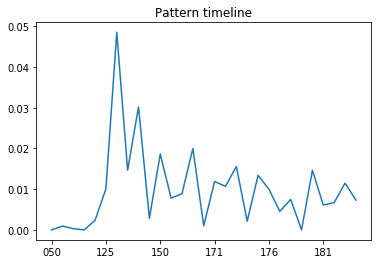

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . . b . . =
= . . . . . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


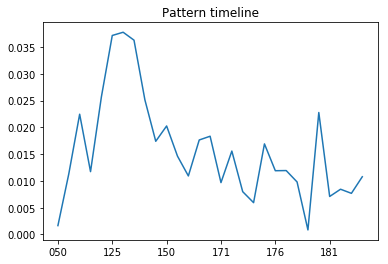

Processing top patterns from 135 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


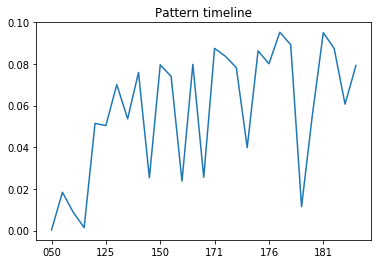

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . . b . . =
= . . . . . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


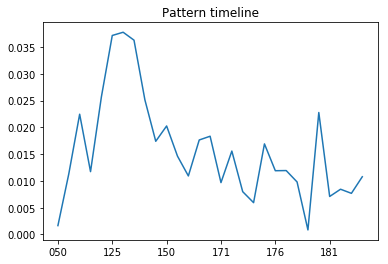

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


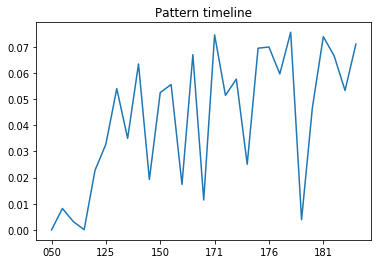

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


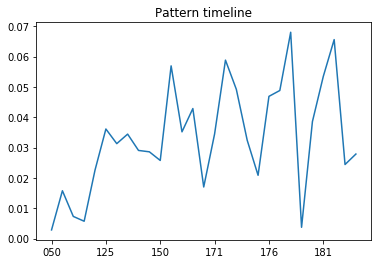

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


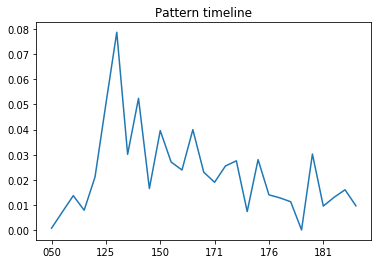

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . b w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


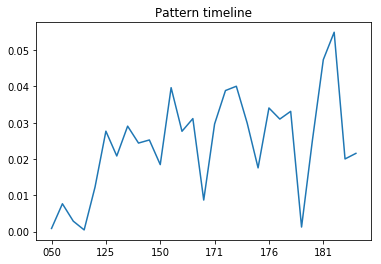

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


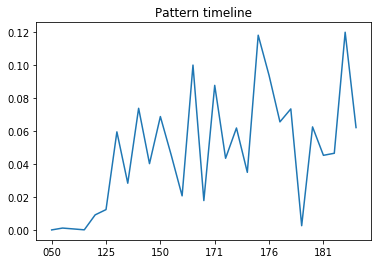

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w b . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


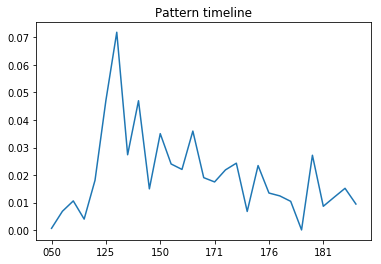

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . . w . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


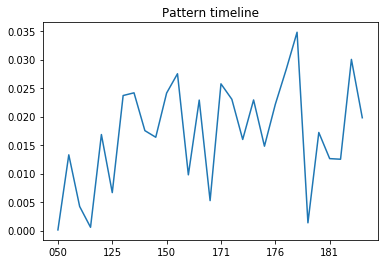

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . . b . . =
= . . . . . . . . . =
= . . w . . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


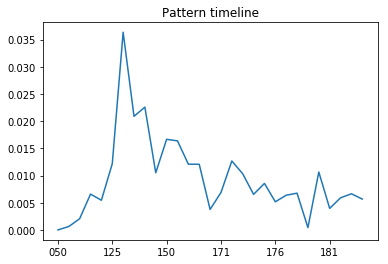

Processing top patterns from 140 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


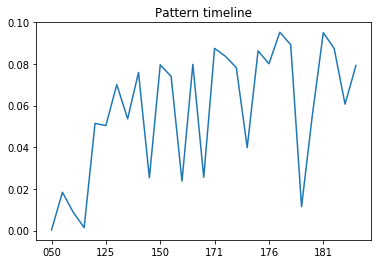

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


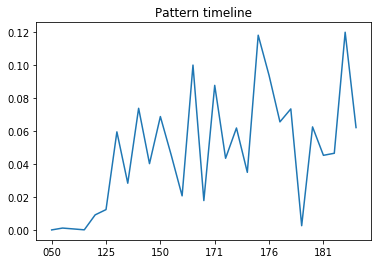

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


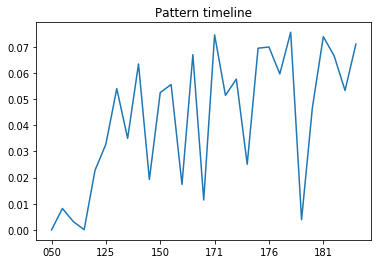

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


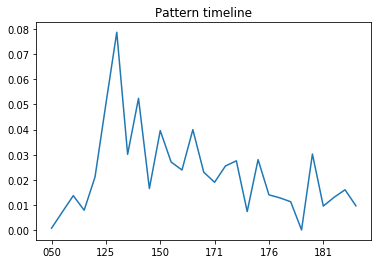

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w b . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


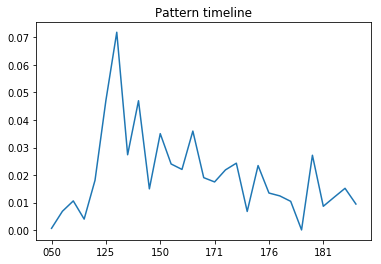

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


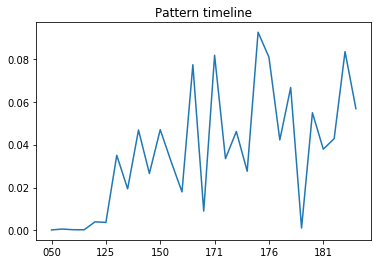

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w b . . =
= . . . . . . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


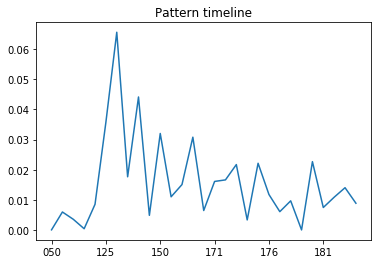

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w w . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


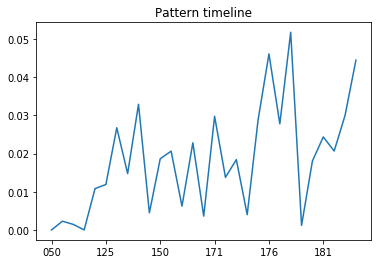

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . b . . . =
= . . . w . w b . . =
= . . . . . . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


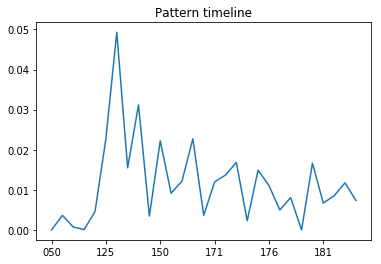

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . b . . . =
= . . . w . w b . . =
= . . . . w . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


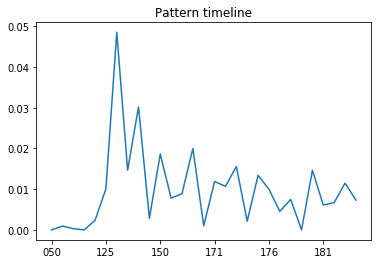

Processing top patterns from 145 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


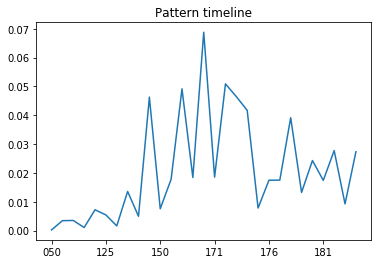

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


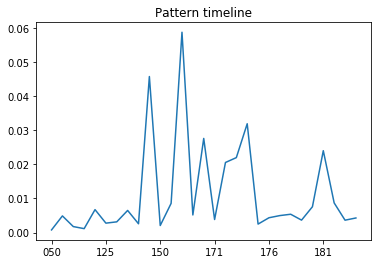

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


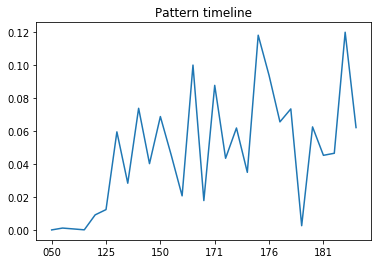

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


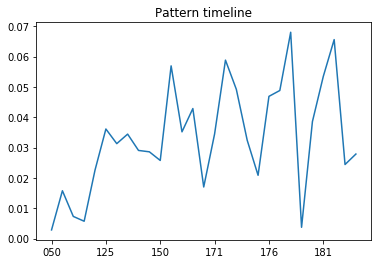

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


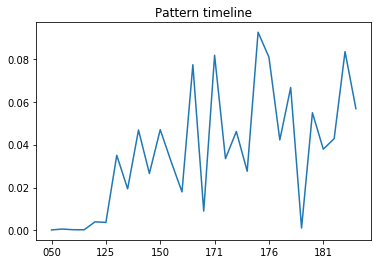

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


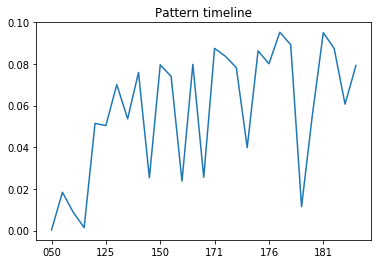

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . b w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


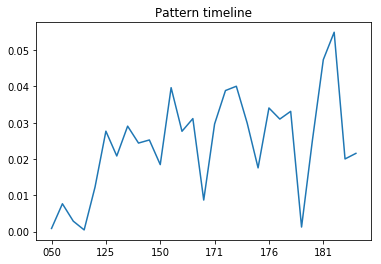

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


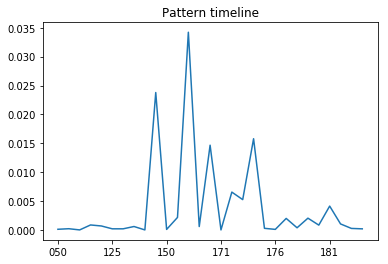

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . w . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


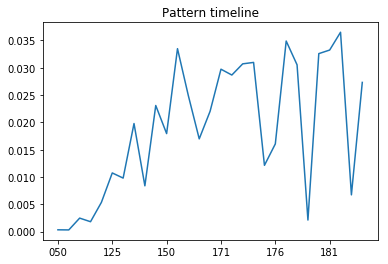

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . b . . . w . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


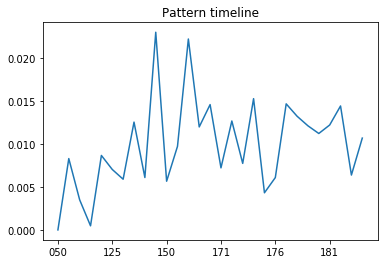

Processing top patterns from 150 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


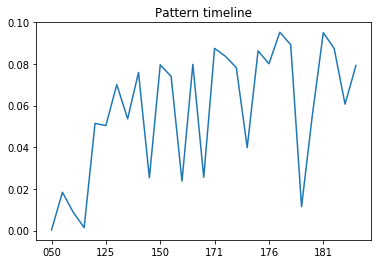

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


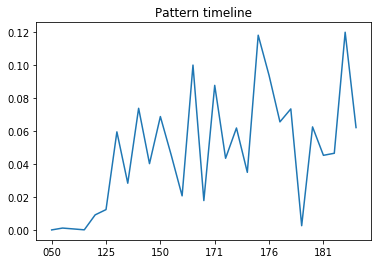

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


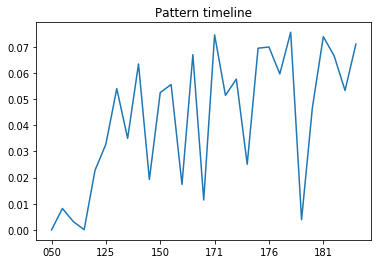

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


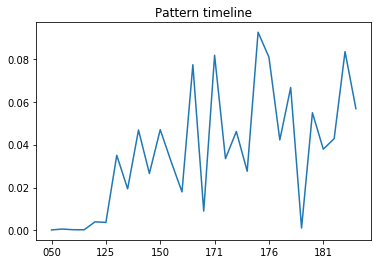

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


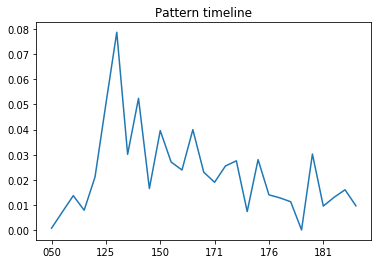

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w b . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


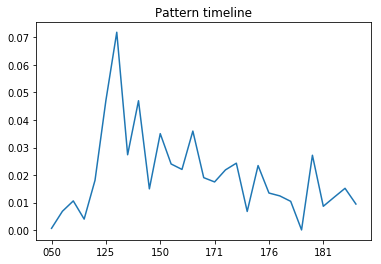

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w b . . =
= . . . . . . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


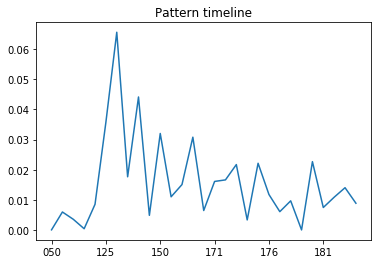

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . b . . . . =
= . . . b w . . . . =
= . . . w . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


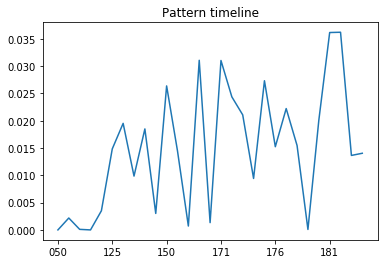

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


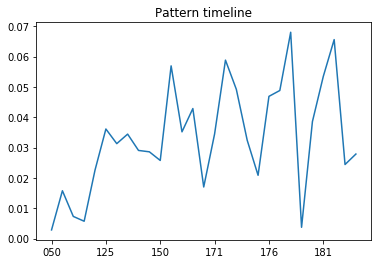

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . . w . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


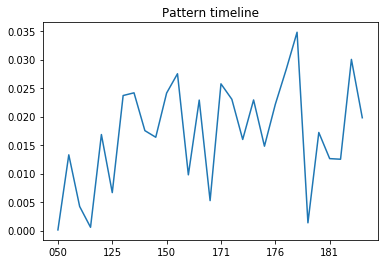

Processing top patterns from 155 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


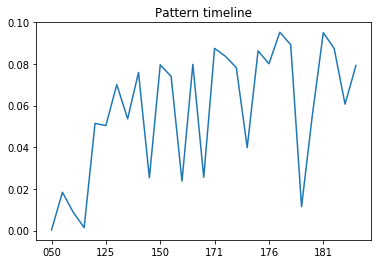

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


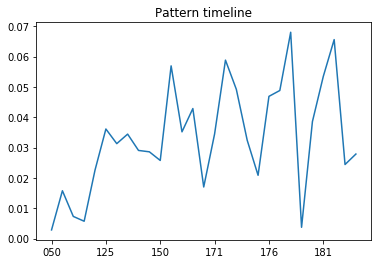

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


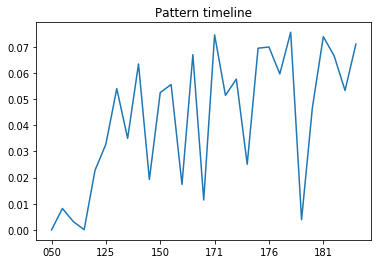

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


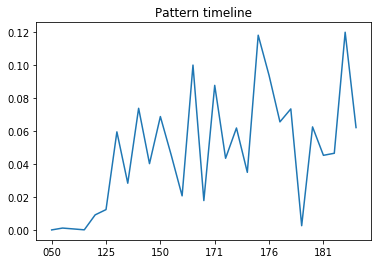

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . b w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


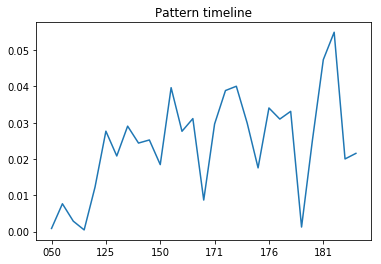

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . . b . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


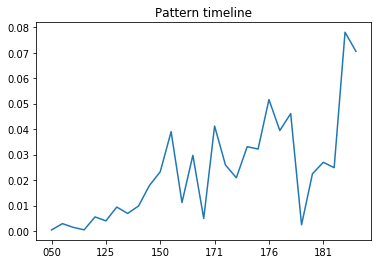

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . w . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


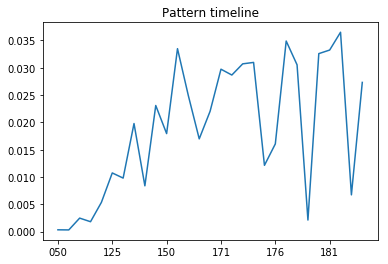

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


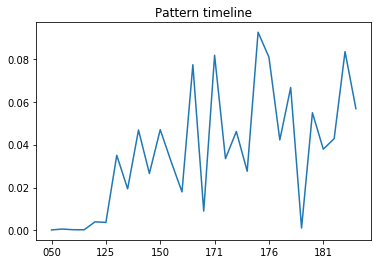

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . b w w . . . . =
= . . w . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


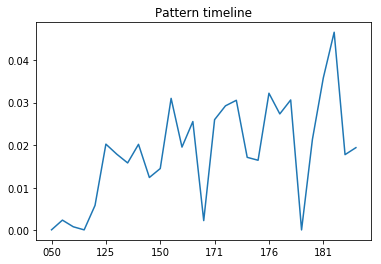

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . w . . . . . =
= . . . w b . . . . =
= . . w b b . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


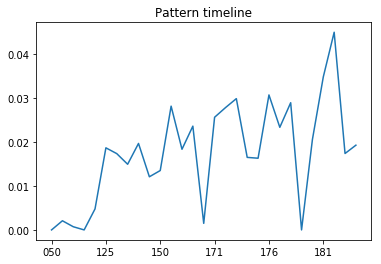

Processing top patterns from 160 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


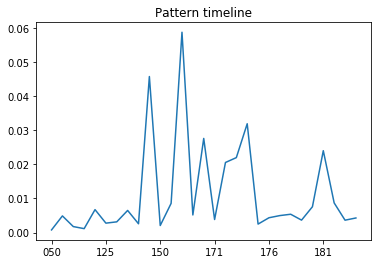

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


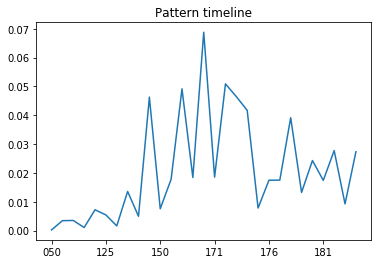

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


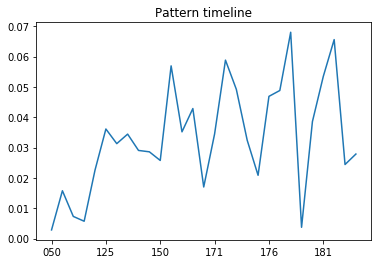

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


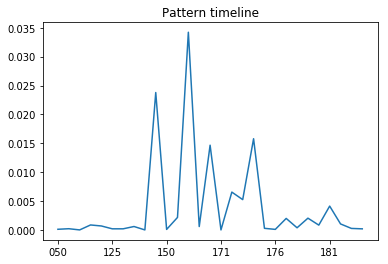

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . b w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


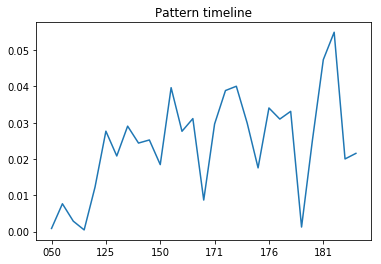

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . w . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


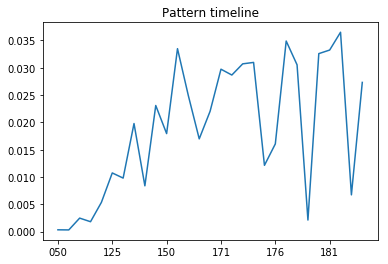

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . b . . . b . . =
= . . . . w . . . . =
= . . . . . . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


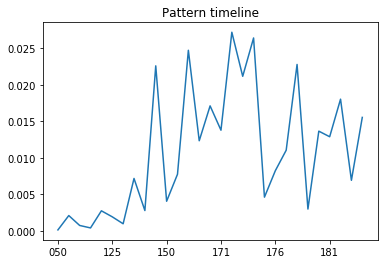

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


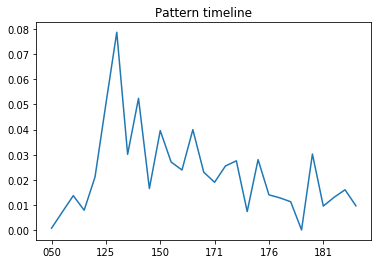

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


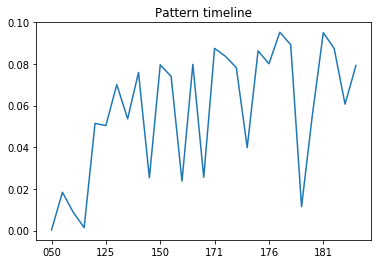

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . b . . . w . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


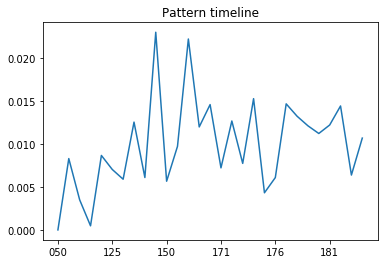

Processing top patterns from 165 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


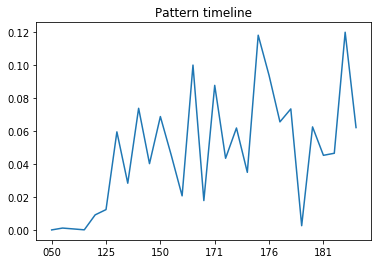

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


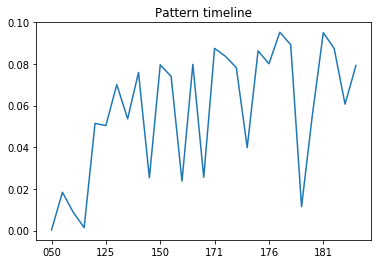

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


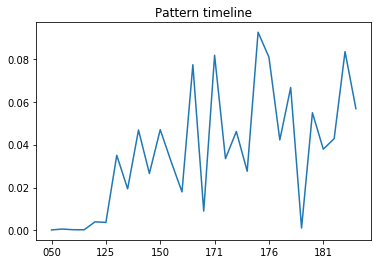

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


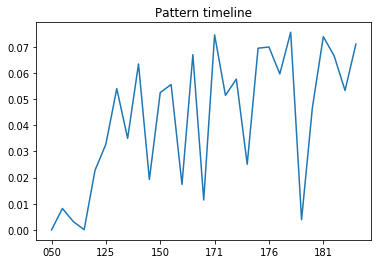

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


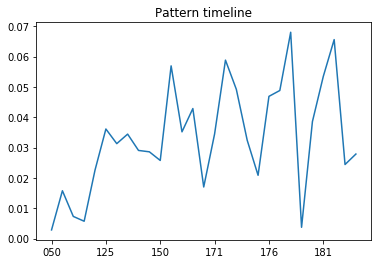

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


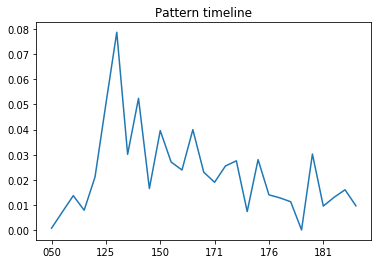

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w b . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


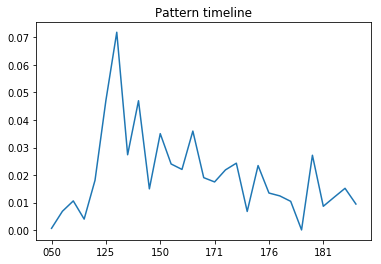

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . b w b . . =
= . . . w . . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


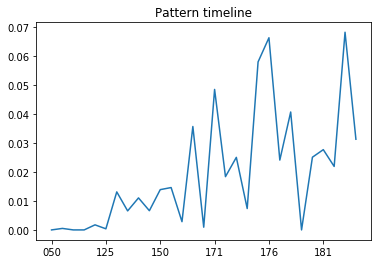

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . b w b . . =
= . . . w . w w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


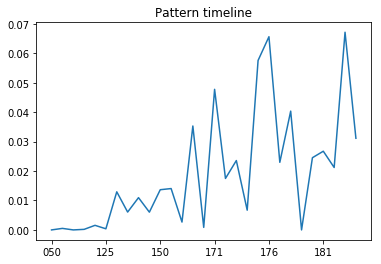

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . w w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


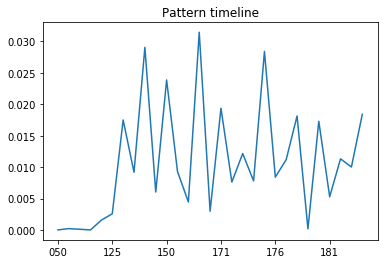

Processing top patterns from 170 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


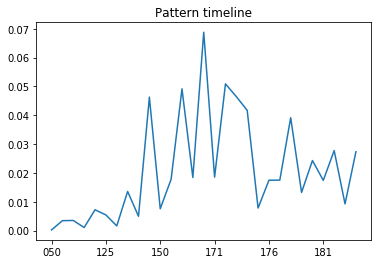

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


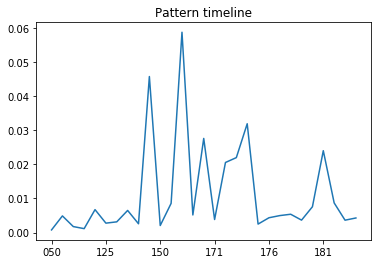

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


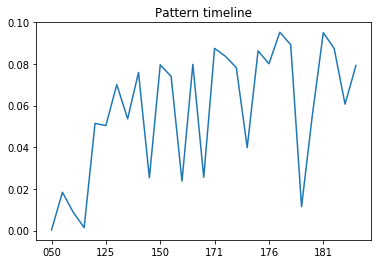

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


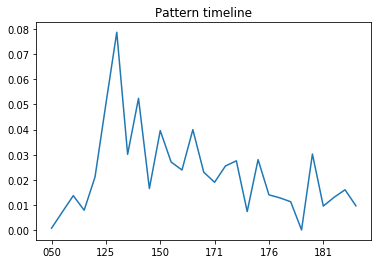

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . w . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


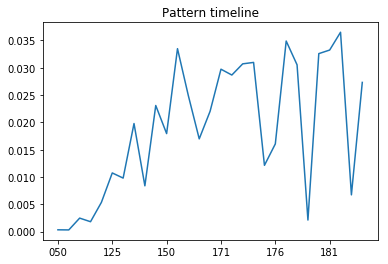

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . . b . . =
= . . w . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


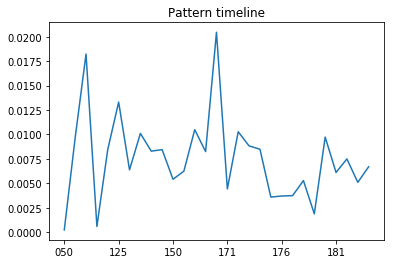

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


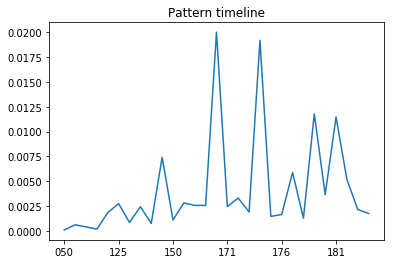

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w b . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


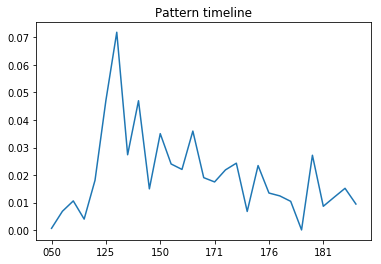

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . . b . . =
= . . . . . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


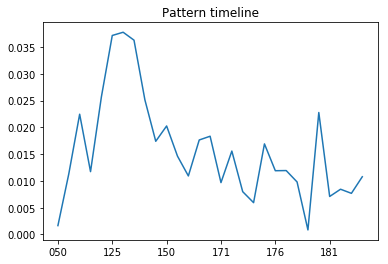

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


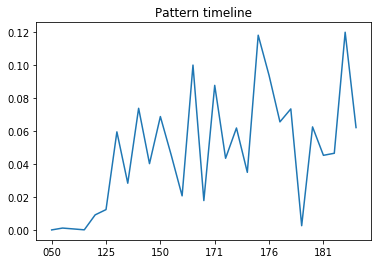

Processing top patterns from 171 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


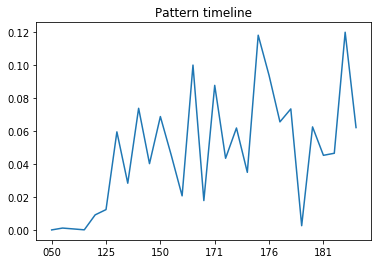

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


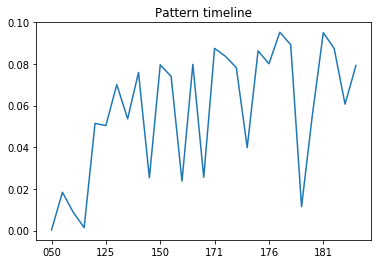

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


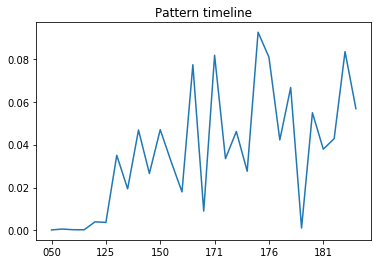

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


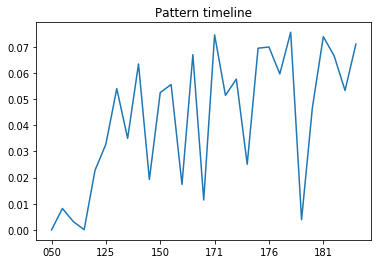

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . b w b . . =
= . . . w . . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


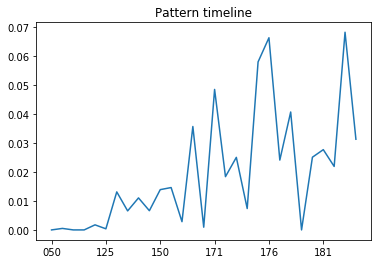

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . b w b . . =
= . . . w . w w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


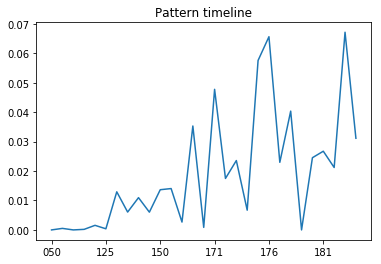

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . . b . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


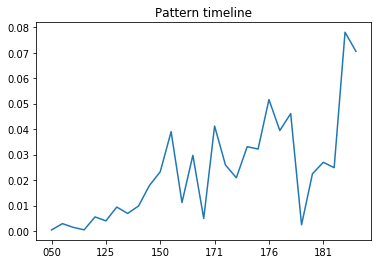

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


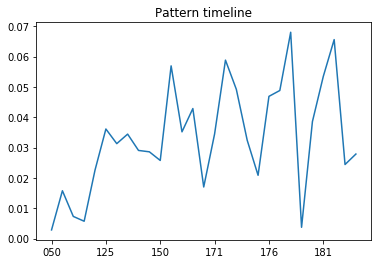

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . b . . . . =
= . . . b w . . . . =
= . . . w . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


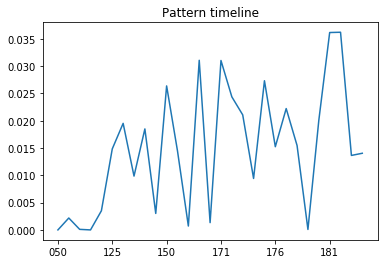

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w w . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


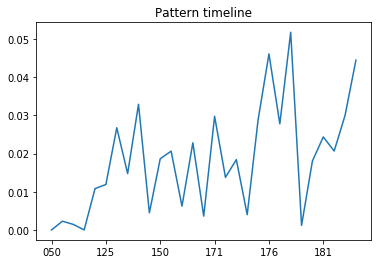

Processing top patterns from 172 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


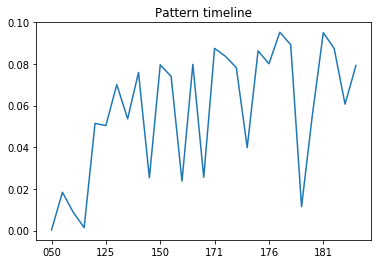

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


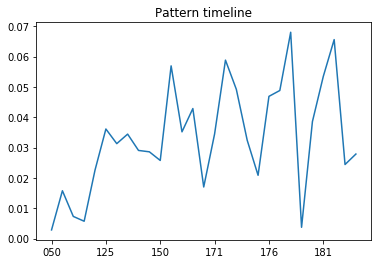

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


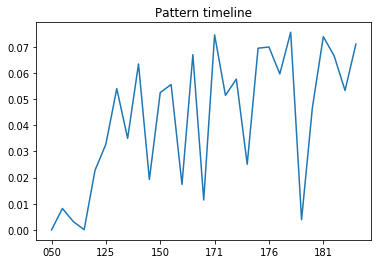

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


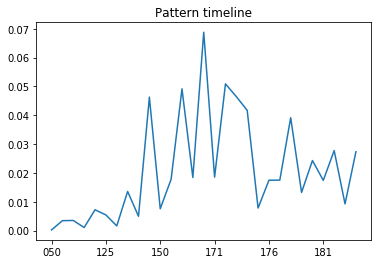

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


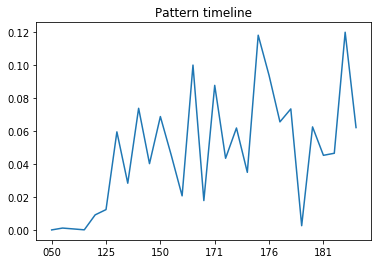

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . b w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


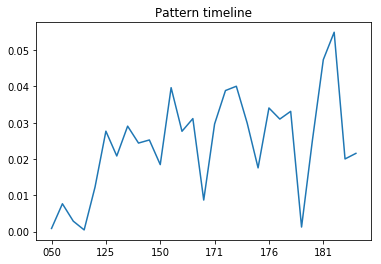

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


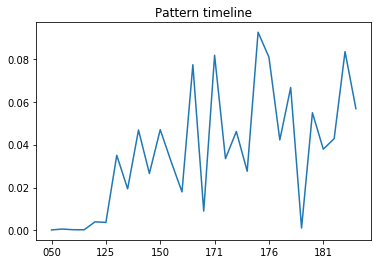

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . b w w . . . . =
= . . w . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


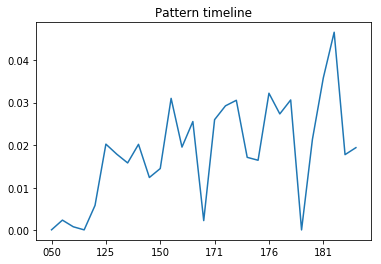

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . w . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


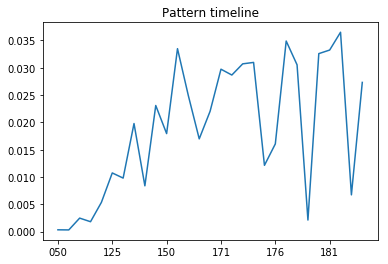

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . w . . . . . =
= . . . w b . . . . =
= . . w b b . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


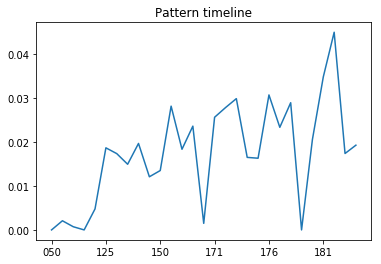

Processing top patterns from 173 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


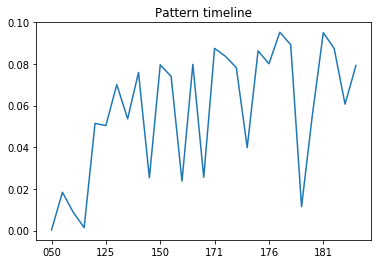

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


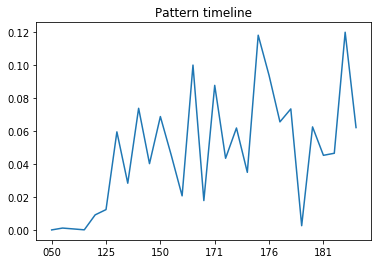

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


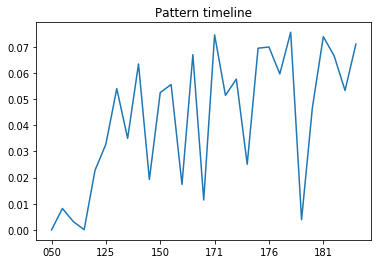

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


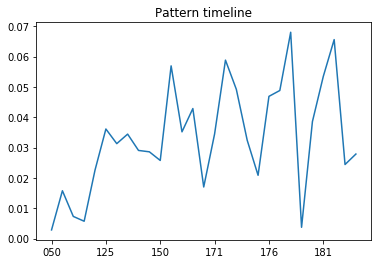

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


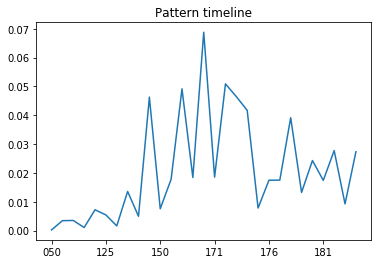

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


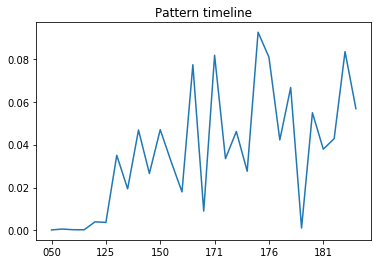

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . b w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


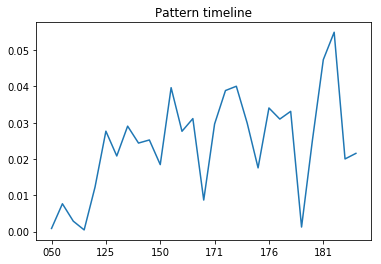

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . w . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


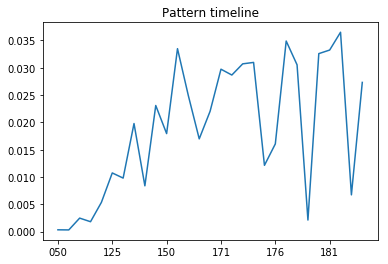

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . b w w . . . . =
= . . w . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


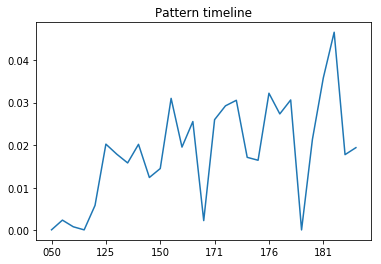

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . b b . . . . . =
= . . b w w . w . . =
= . . w . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


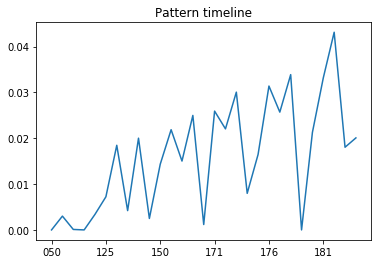

Processing top patterns from 174 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


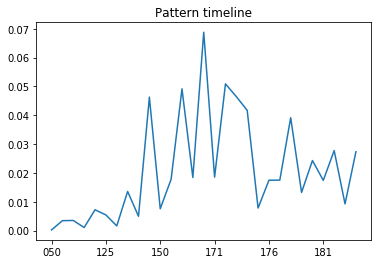

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


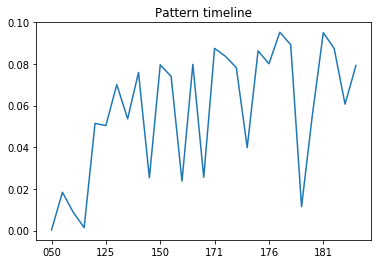

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


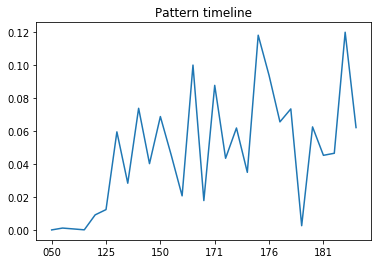

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . . b . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


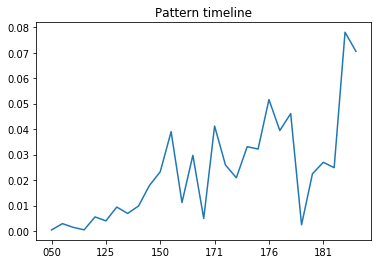

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


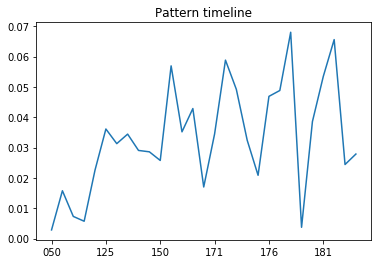

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


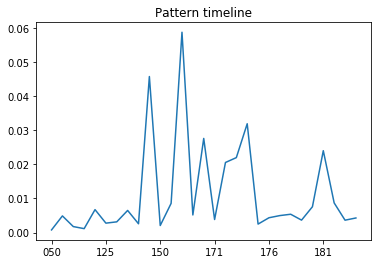

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . w . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


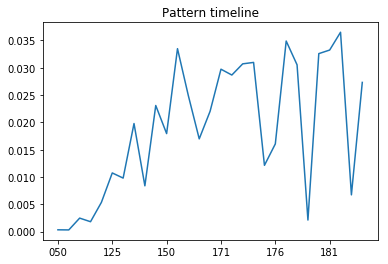

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . b w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


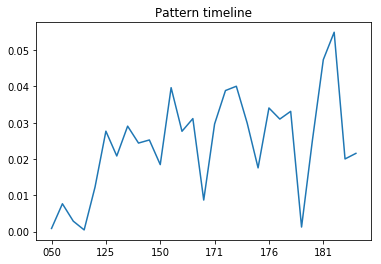

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


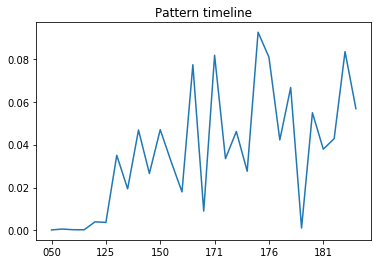

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . b . . . b . . =
= . . . . w . . . . =
= . . . . . . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


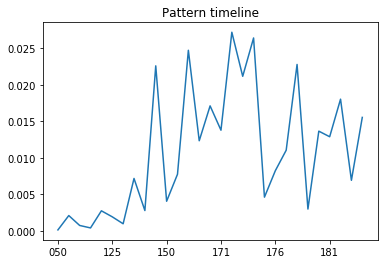

Processing top patterns from 175 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


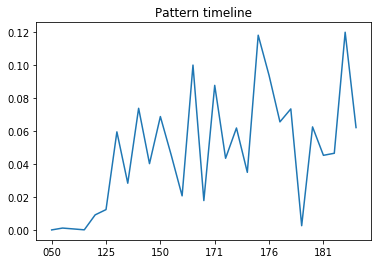

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


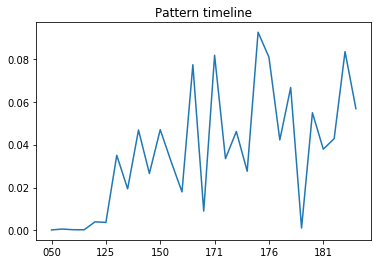

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


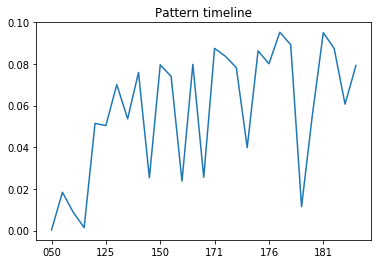

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


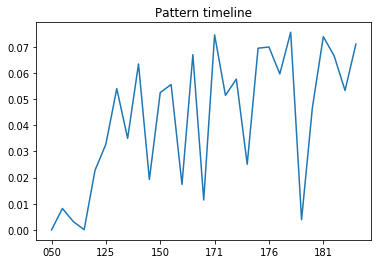

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . b w b . . =
= . . . w . . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


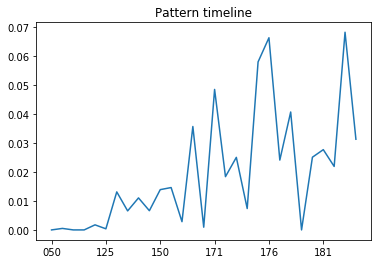

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . b w b . . =
= . . . w . w w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


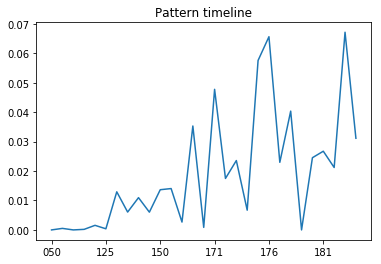

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . . b . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


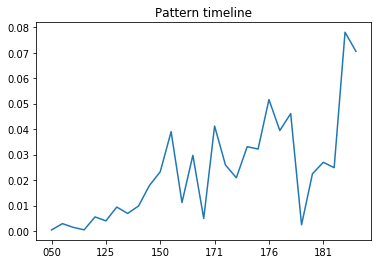

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . w w . . . . =
= . . . w b b . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


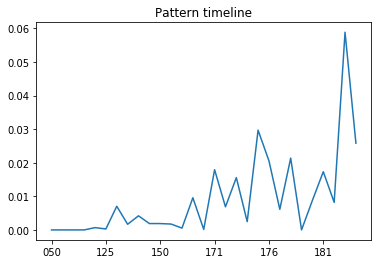

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w w . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


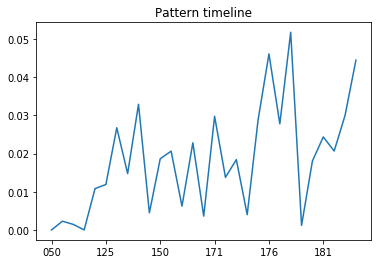

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . w w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


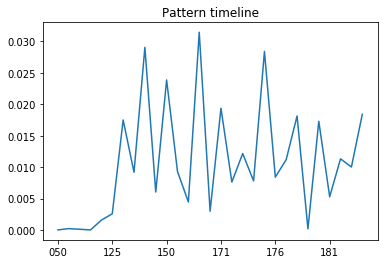

Processing top patterns from 176 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


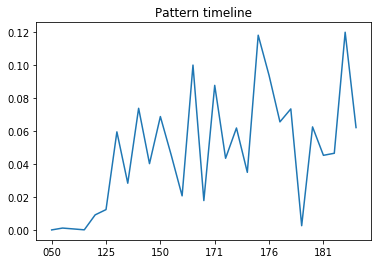

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


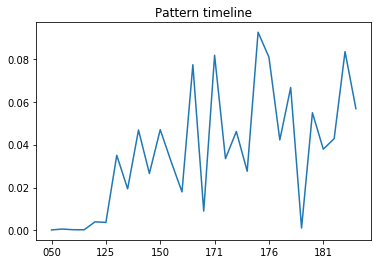

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


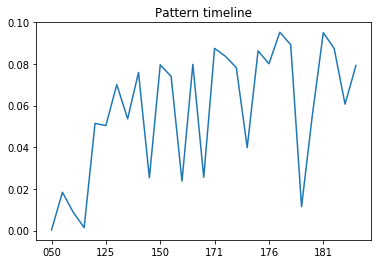

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


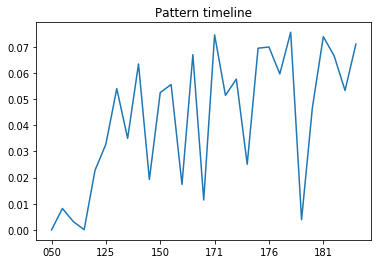

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . b w b . . =
= . . . w . . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


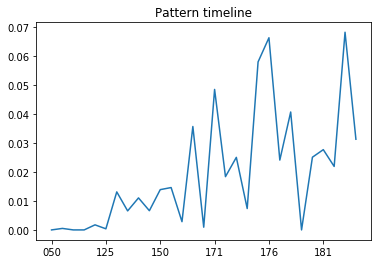

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . b w b . . =
= . . . w . w w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


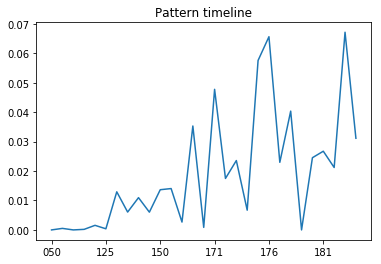

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . . b . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


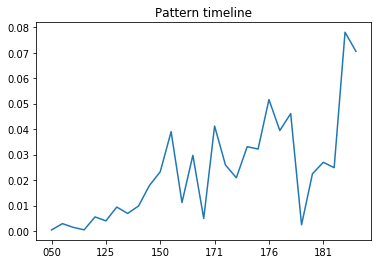

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


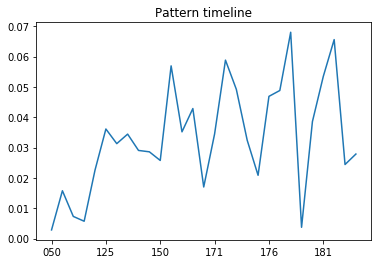

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w w . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


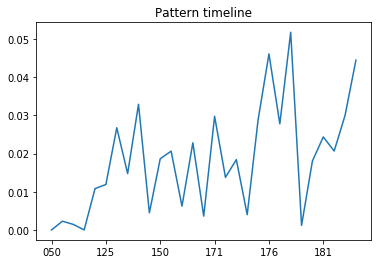

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b b w b . . =
= . . . w . w w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


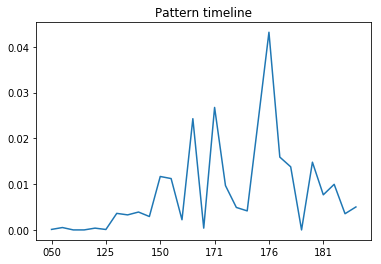

Processing top patterns from 177 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


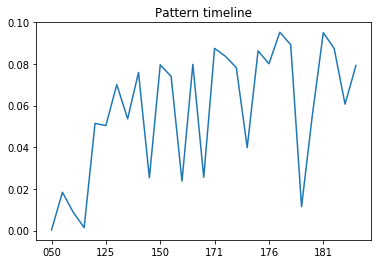

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


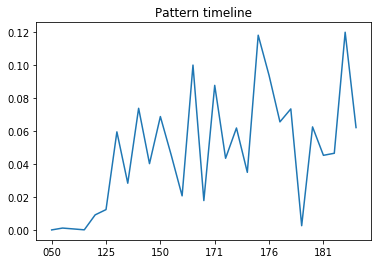

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


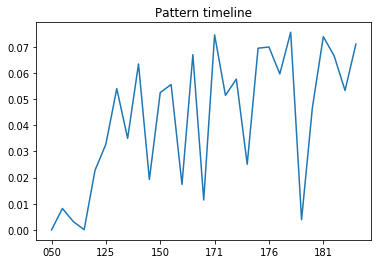

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


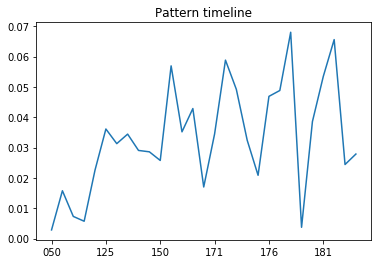

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


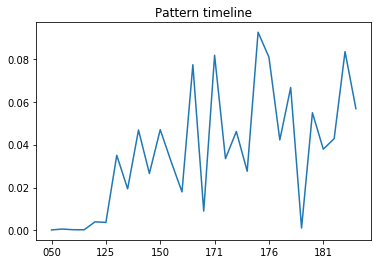

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . . b . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


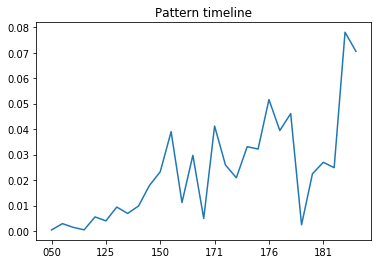

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . w . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


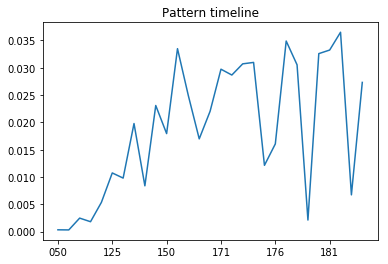

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . b w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


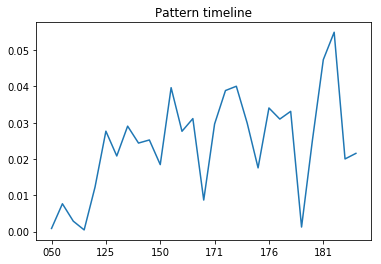

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . . w . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


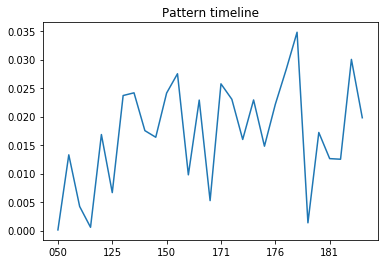

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w w . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


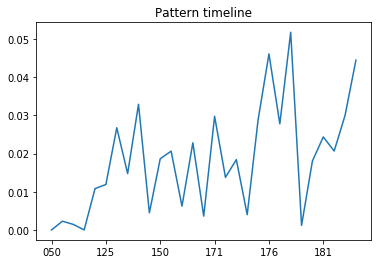

Processing top patterns from 178 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


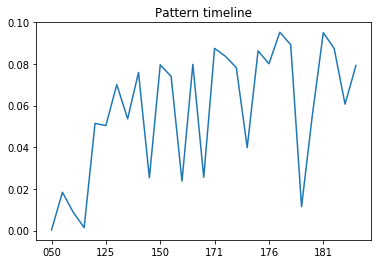

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


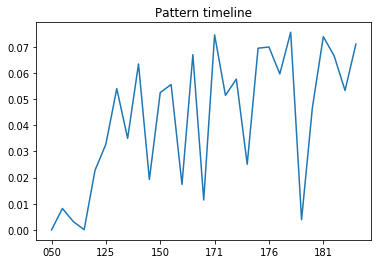

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


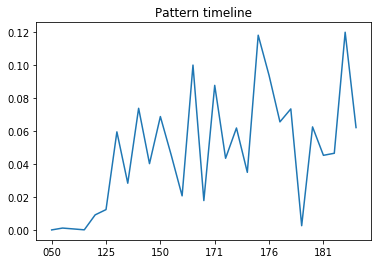

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


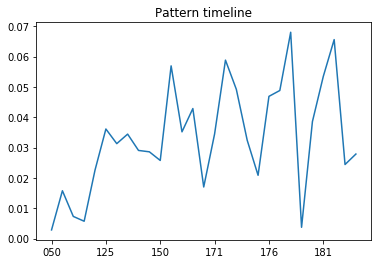

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


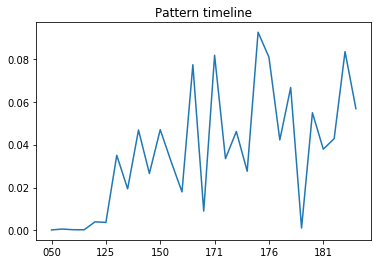

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w w . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


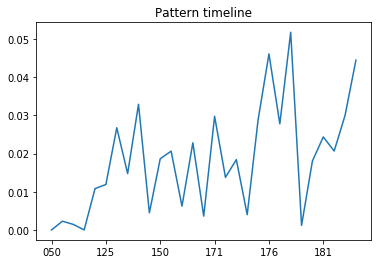

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . . b . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


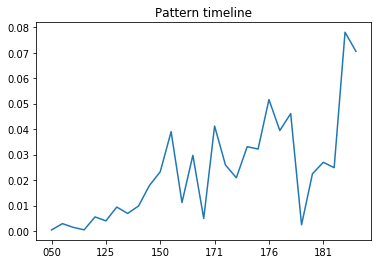

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . b w b . . =
= . . . w . . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


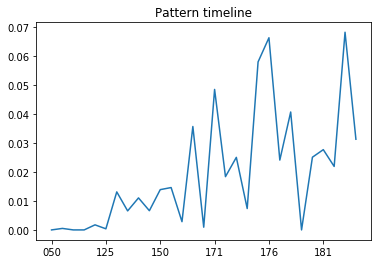

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . b w b . . =
= . . . w . w w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


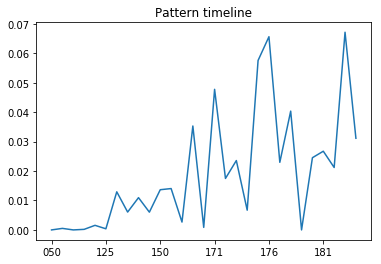

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


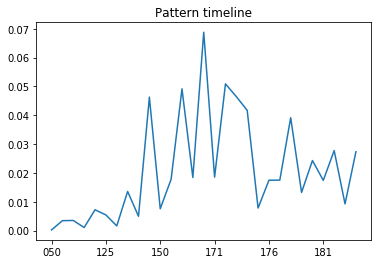

Processing top patterns from 179 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . . b . . =
= . . . . w . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


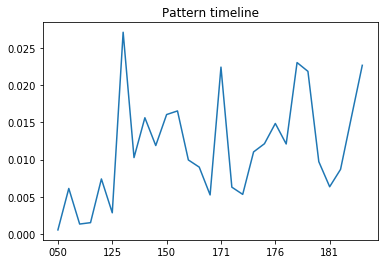

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . . w . . =
= . . . . . b w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


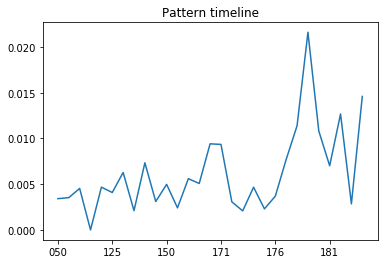

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


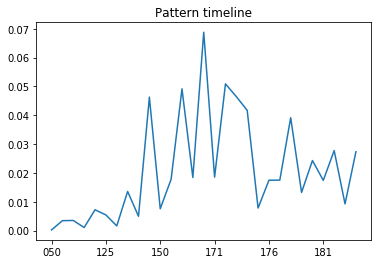

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . b . . . w . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


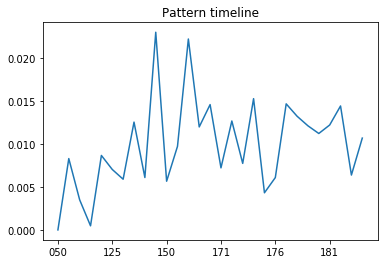

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


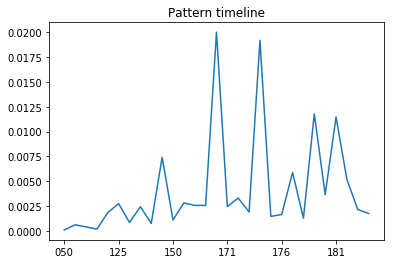

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


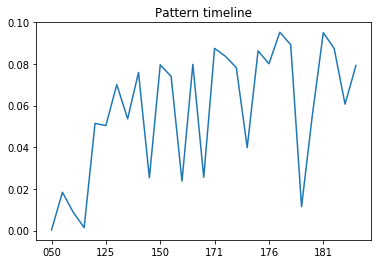

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . w . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


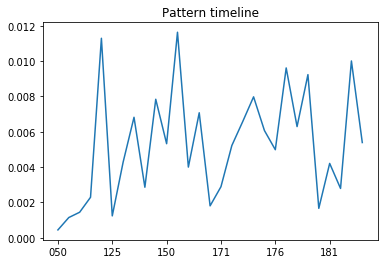

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . b . . . w . . =
= . . w . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


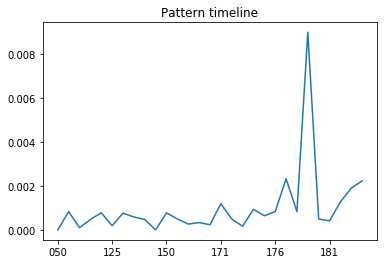

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


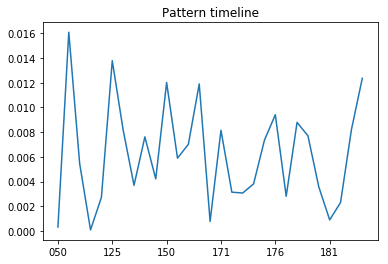

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . b . . . =
= . . . . . w w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


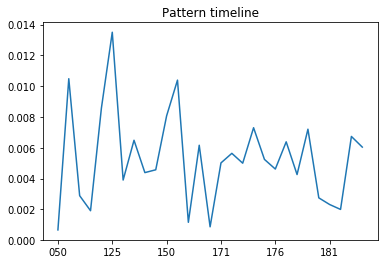

Processing top patterns from 180 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


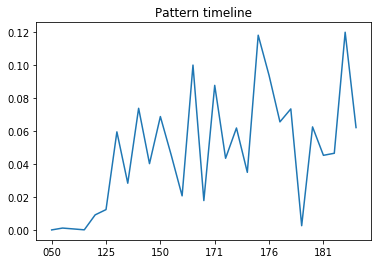

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


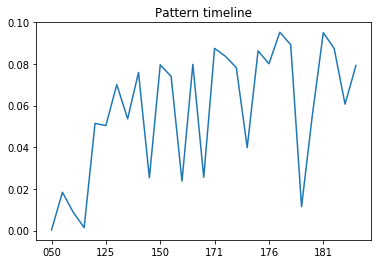

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


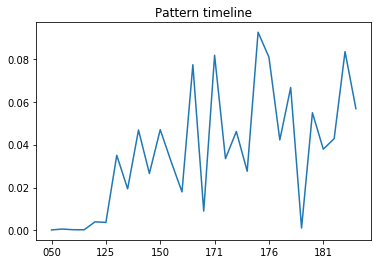

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


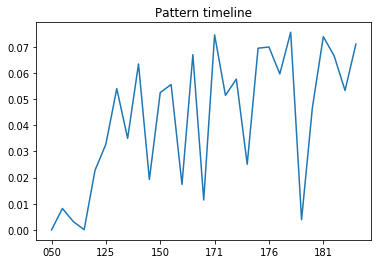

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


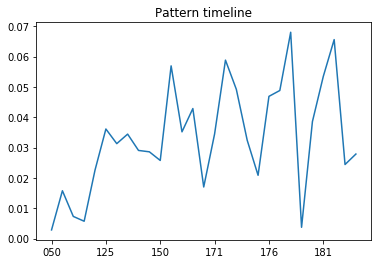

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . w . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


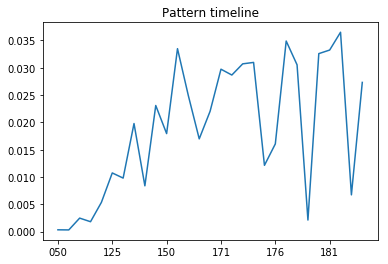

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


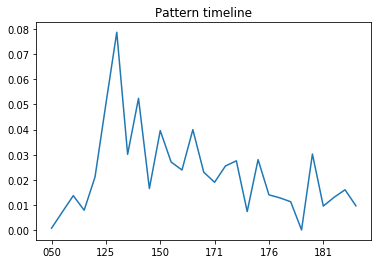

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . b . . . =
= . . . . . . . . . =
= . . . w . w b . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


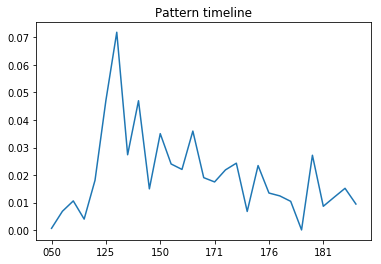

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w b . . . . =
= . . . w . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


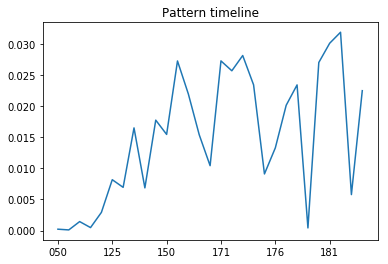

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . b w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


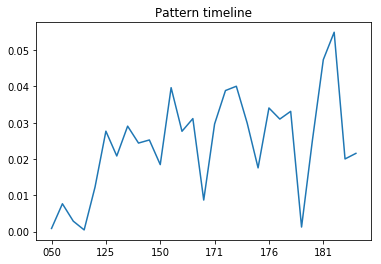

Processing top patterns from 181 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


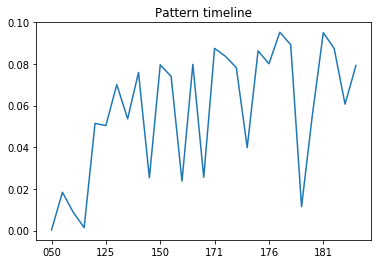

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


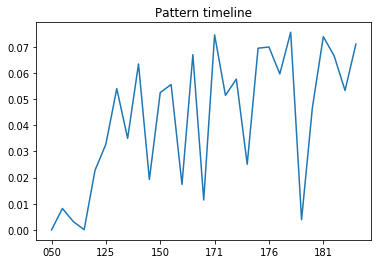

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


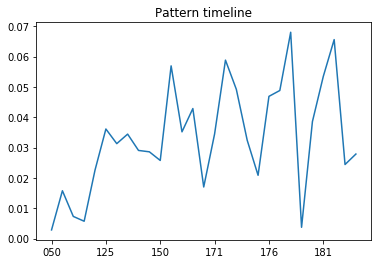

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . b w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


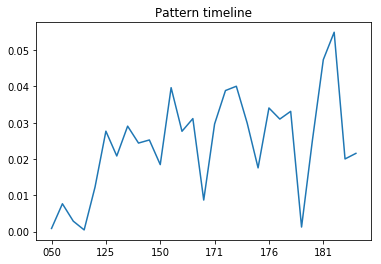

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


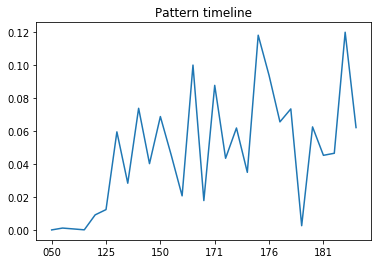

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


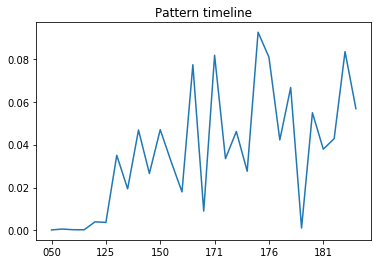

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . b . . . . =
= . . . b w . . . . =
= . . . w . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


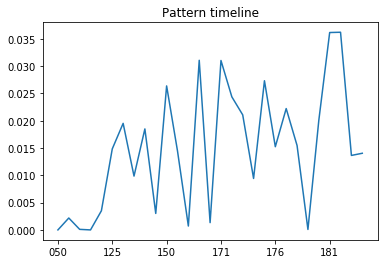

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . b w w . . . . =
= . . w . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


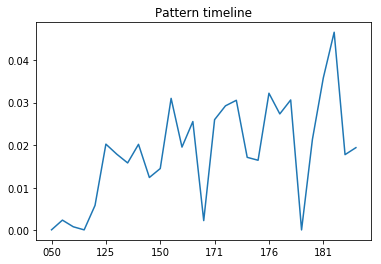

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . w . . . . . =
= . . . w b . . . . =
= . . w b b . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


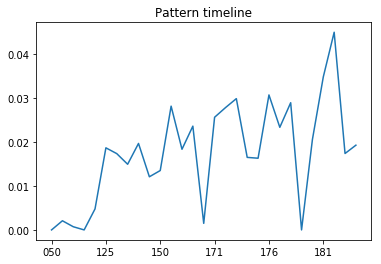

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . w . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


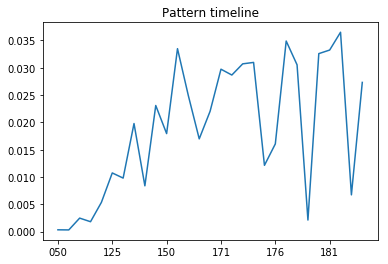

Processing top patterns from 182 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


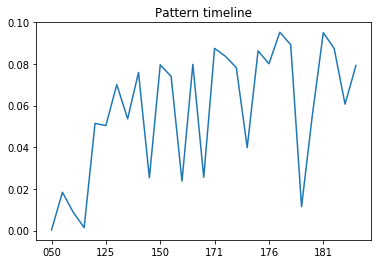

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


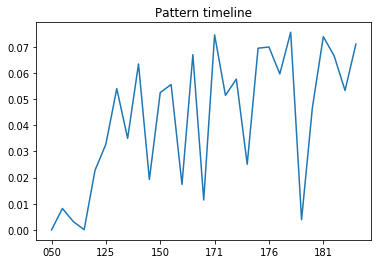

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . . w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


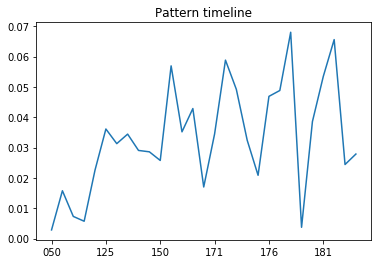

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . b w w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


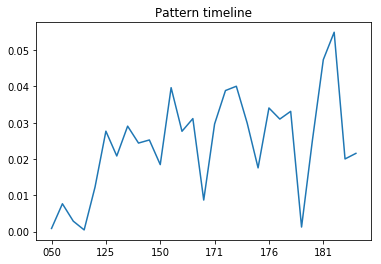

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


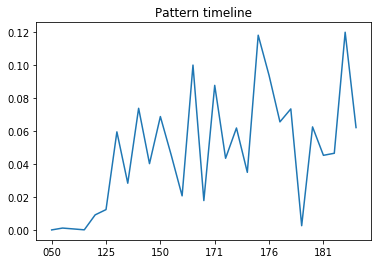

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . b . . . . . =
= . . b w w . . . . =
= . . w . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


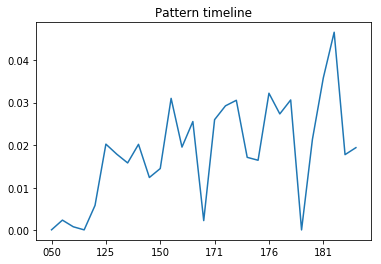

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . w . . . . . =
= . . . w b . . . . =
= . . w b b . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


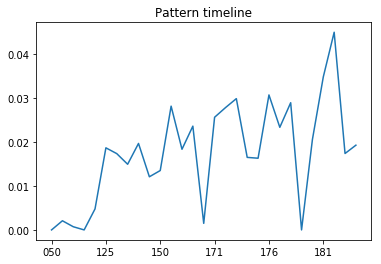

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . b b . . . . . =
= . . b w w . w . . =
= . . w . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


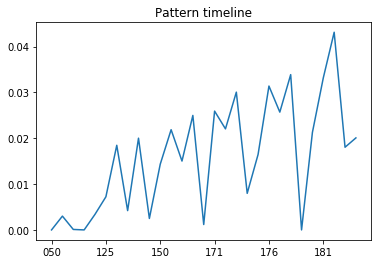

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


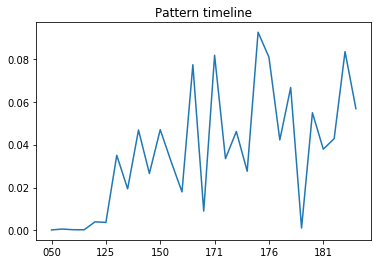

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . b b . . b . . =
= . . b w w . w . . =
= . . w . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


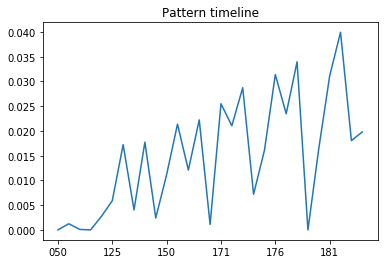

Processing top patterns from 183 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


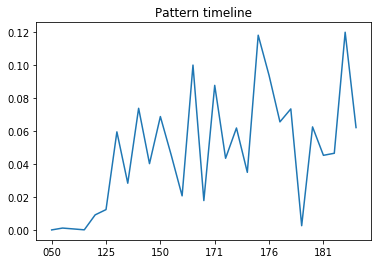

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


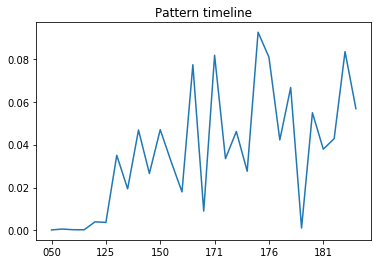

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . . b . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


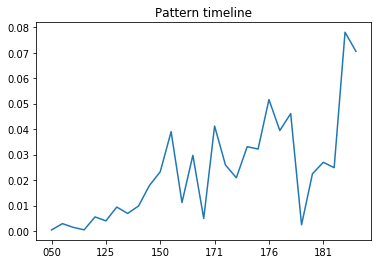

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . b w b . . =
= . . . w . . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


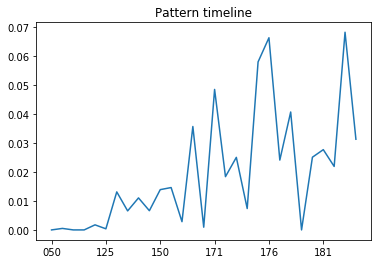

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . b w b . . =
= . . . w . w w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


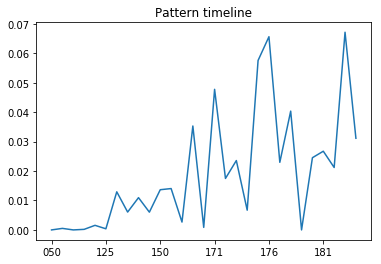

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


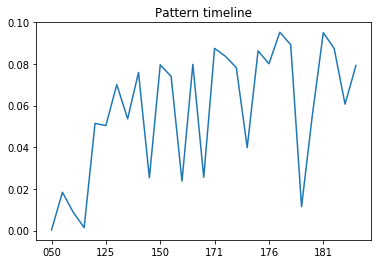

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . w w . . . . =
= . . . w b b . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


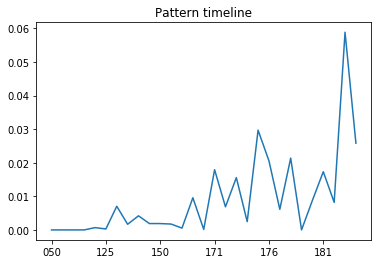

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


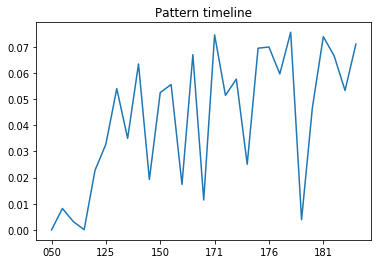

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . b . . . w . . =
= . . . . b . . . . =
= . . . . . . w . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


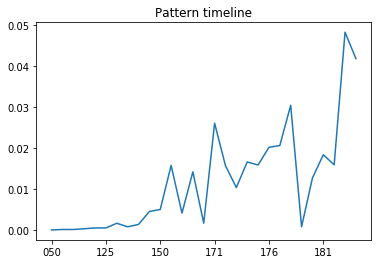

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . w w . . . . =
= . . . w b b . . . =
= . . . b w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


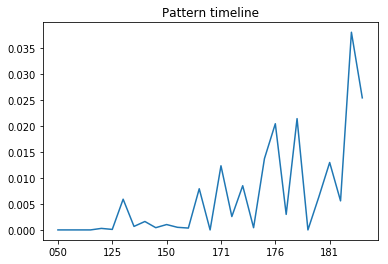

Processing top patterns from 184 min_num_stones 3
= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


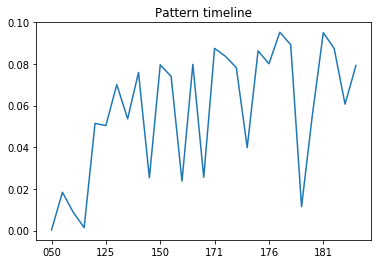

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


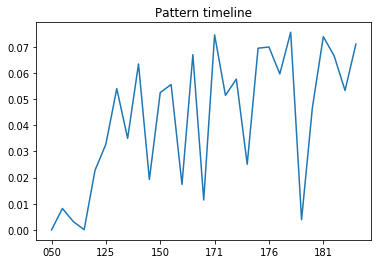

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . b . . . . =
= . . . . . . b . . =
= . . . w . w . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


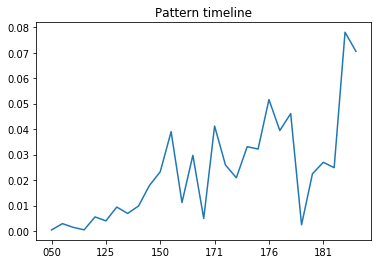

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


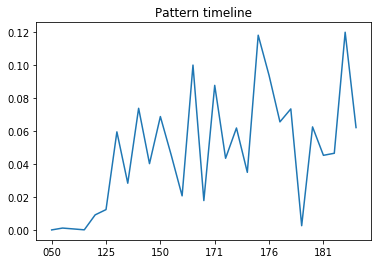

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . w b . . . . =
= . . . . w b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


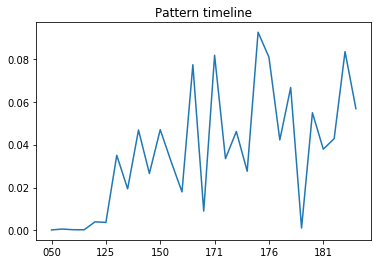

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . . . . . . =
= . . . . b w w . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


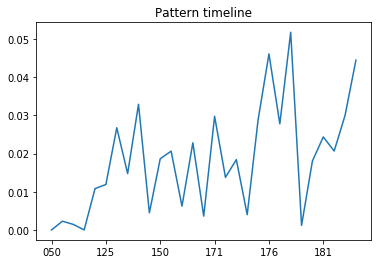

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . b . . . w . . =
= . . . . b . . . . =
= . . . . . . w . . =
= . . . . . b . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


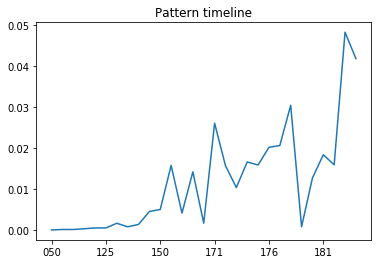

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . b w b . . =
= . . . w . . w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


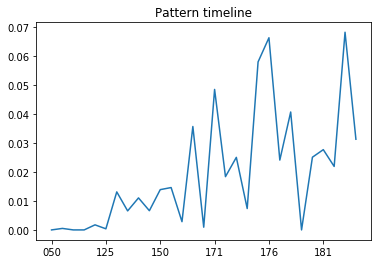

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . b . . . =
= . . . . b w b . . =
= . . . w . w w . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= = = = = = = = = = =


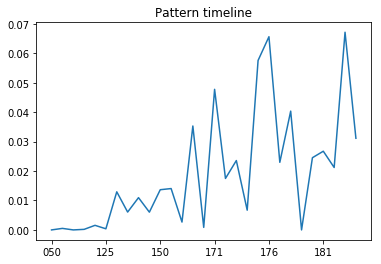

= = = = = = = = = = =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . . . . . . . =
= . . . b . w . . . =
= . . . . b . . . . =
= . . . . b w w . . =
= . . . . . b . . . =
= . . . . . . . . . =
= = = = = = = = = = =


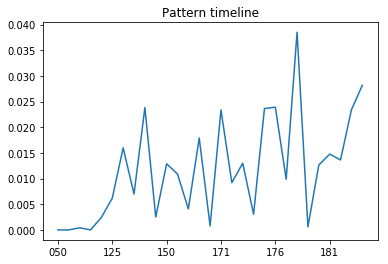

In [115]:
for c in df.columns:
    timeline_top_patterns_from_version(c, max_display_patterns=10, min_num_stones=3)